# ML Regression project - Store Sales Prediction (Time Series Forecasting)

## Introduction

Businesses must forecast product demand to compete. This is especially true for brick-and-mortar grocery stores, which must dance delicately with how much inventory to buy. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leading to lost revenue and upset customers. More accurate forecasting, thanks to machine learning, could help ensure retailers make the customers happy by having just enough of the right products at the right time. Everyone hates when their favourite item is out of stock.

Current subjective forecasting methods for retail have little data to back them up and are unlikely to be automated. The problem becomes even more complex as retailers add new locations with unique needs, new products, ever-transitioning seasonal tastes, and unpredictable changing market conditions.For grocery stores, more accurate forecasting can decrease food waste related to overstocking and improve customer satisfaction.

In this project, we will use regression, a specific type of supervised machine learning that focuses on predicting continuous numerical values, to predict grocery store sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers.

## 1. Business Understanding

The primary objective of this machine learning project is to develop an accurate predictive model for forecasting grocery store sales at Favorita stores in Ecuador. This model will help address the challenge faced by brick-and-mortar grocery stores in managing their inventory effectively. The goal is to predict sales for thousands of product families, considering various factors such as dates, store information, product details, and promotional activities. By achieving this objective, we aim to minimize overstocking, reduce food waste, and enhance customer satisfaction by ensuring that the right products are available in the right quantities at the right time.

For this project, we are dealing with a Time series forecasting problem. Time series forecasting involves predicting unknown values by collecting historical data, preparing it for algorithms to consume, and then predicting the future values based on patterns learned from the historical data.

We will explore different machine learning algorithms to determine the most suitable one. Potential models include but are not limited to:

1. **Time Series Forecasting**: Utilizing techniques such as ARIMA, LSTM, or Prophet to capture temporal patterns and seasonality in sales data.

2. **Regression Models**: Employing linear regression, decision trees, random forests, or gradient boosting to account for various features like promotional status, product details, and store information.

To assess the performance of the predictive model, we will use metrics such as Root Mean Squared Logarithmic Error (RMSLE), Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). The errors will be aggregated to evaluate the forecast bias. To be certain whether the model tends to underpredict or overpredict sales, which can be crucial for inventory management.

The CRISP-DM (Cross-Industry Standard Process for Data Mining) framework will guide our project, ensuring a structured and iterative approach to solving the forecasting problem. This framework encompasses phases such as Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, Deployment, and Maintenance, allowing us to systematically develop and deploy an effective sales forecasting solution for Favorita stores in Ecuador.

### Hypothesis

**Null Hypothesis (H0)**:
"There is no significant relationship between store sales and when products are on promotion."

**Alternative Hypothesis (Ha)**:
"There is a significant relationship between store sales and when products are on promotion."

### Research Questions

1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year?

3. Did the earthquake impact sales?

4. Are certain groups of stores selling more products? (Cluster, city, state, type)

5. Are sales affected by promotions, oil prices and holidays?

6. What analysis can we get from the date and its extractable features?

7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

## 2. Data Understanding

### Installing libraries  and Packages
Here is the section to import all the packages/libraries that will be used through this notebook.

In [1]:
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Data handling
import pandas as pd
pd.set_option('display.max_columns', None)
import openpyxl
import numpy as np
from zipfile import ZipFile
import zipfile
from datetime import timedelta

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots

# EDA (pandas-profiling, etc. )
import scipy.stats as stats
from statsmodels.tsa.stattools import kpss
from scipy.stats import t, ttest_ind, chi2_contingency
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )


# Other packages
import os, joblib

### Data Loading
#### Accessing first dataset from the database
We want to access 3 files. These are the files:

1. dbo.oil
2. dbo.holidays_events
3. dbo.stores

In [2]:
# Extract train data from zip

with ZipFile("Zip files/train.zip", 'r') as zObject:
  
    # Extracting file in the zip
    zObject.extract(
        "train.csv", path="Dataset")
zObject.close()

In [3]:
# Read CSV and change date column from object to date type

holidays=pd.read_csv("Dataset/holidays_events.csv", parse_dates =['date'])
oil=pd.read_csv("Dataset/oil.csv", parse_dates =['date'])
sample=pd.read_csv("Dataset/sample_submission.csv")
stores=pd.read_csv("Dataset/stores.csv")
test=pd.read_csv("Dataset/test.csv", parse_dates =['date'])
train=pd.read_csv("Dataset/train.csv", parse_dates =['date'])
transactions=pd.read_csv("Dataset/transactions.csv", parse_dates =['date'])

### Exploratory Data Analysis

##### Training data

In [4]:
# view first 5 rows
train.head()

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

In [5]:
# view info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


- Features and descriptions of train and test dataset

| Feature            | Description                                                                                                      |
| ---------------- | ---------------------------------------------------------------------------------------------------------------- |
| store_nbr           | identifies the store at which the products are sold.                                                                       |
| family    | identifies the type of product sold.                                                                    |
| sales          | gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).                                                              |
| onpromotion       | gives the total number of items in a product family that were being promoted at a store at a given date.                                                             |



In [6]:
# Check for missing values using isna()
missing_values = train.isna().sum()

# Count missing values in each column
missing_counts = missing_values.sum()

# Check if there are any missing values in the entire DataFrame
any_missing = missing_values.any().any()

print("Missing Values in DataFrame:")
print(missing_values)
print("\nMissing Value Counts in Each Column:")
print(missing_counts)
print("\nAre there any missing values in the DataFrame?", any_missing)

Missing Values in DataFrame:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Missing Value Counts in Each Column:
0

Are there any missing values in the DataFrame? False


- No missing values in train dataset

In [7]:
# format numerical columns to 2 decimal places with comma separator
pd.options.display.float_format = '{:,.2f}'.format

# statistics for numerical columns
train.describe().T

count                           mean                  min  \
id          3,000,888.00                   1,500,443.50                 0.00   
date             3000888  2015-04-24 08:27:04.703088384  2013-01-01 00:00:00   
store_nbr   3,000,888.00                          27.50                 1.00   
sales       3,000,888.00                         357.78                 0.00   
onpromotion 3,000,888.00                           2.60                 0.00   

                             25%                  50%                  75%  \
id                    750,221.75         1,500,443.50         2,250,665.25   
date         2014-02-26 18:00:00  2015-04-24 12:00:00  2016-06-19 06:00:00   
store_nbr                  14.00                27.50                41.00   
sales                       0.00                11.00               195.85   
onpromotion                 0.00                 0.00                 0.00   

                             max        std  
id                  3,000,887.00 866,281.89  
date         2017-08-15 00:00:00        NaN  
store_nbr                  54.00      15.59  
sales                 124,717.00   1,102.00  
onpromotion               741.00      12.22

#### Let us start by plotting frequencies of data point on yearly/monthly basis

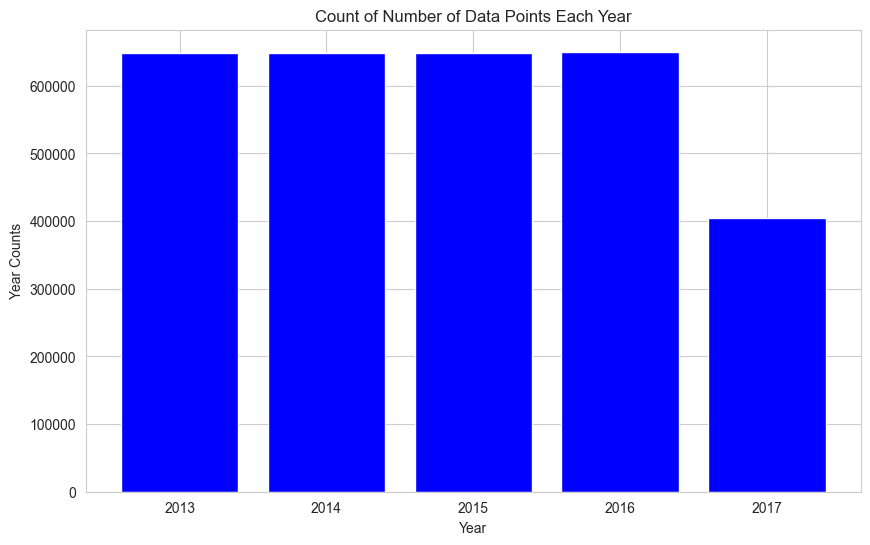

In [8]:
# copy train dataset so that we work with a copy, not the original
train_copy = train.copy()

# extracting the year column
train_copy['year'] = pd.to_datetime(train['date']).dt.year

# Grouping by year and count the data points
year_data = train_copy.groupby('year').size().reset_index(name='counts')

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(year_data['year'], year_data['counts'], color='blue')
ax.set_xticks(year_data['year'])
ax.set_title('Count of Number of Data Points Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('Year Counts')

plt.show()

- There has been a uniformity of data counts from 2013-2016 but the count dropped in 2017

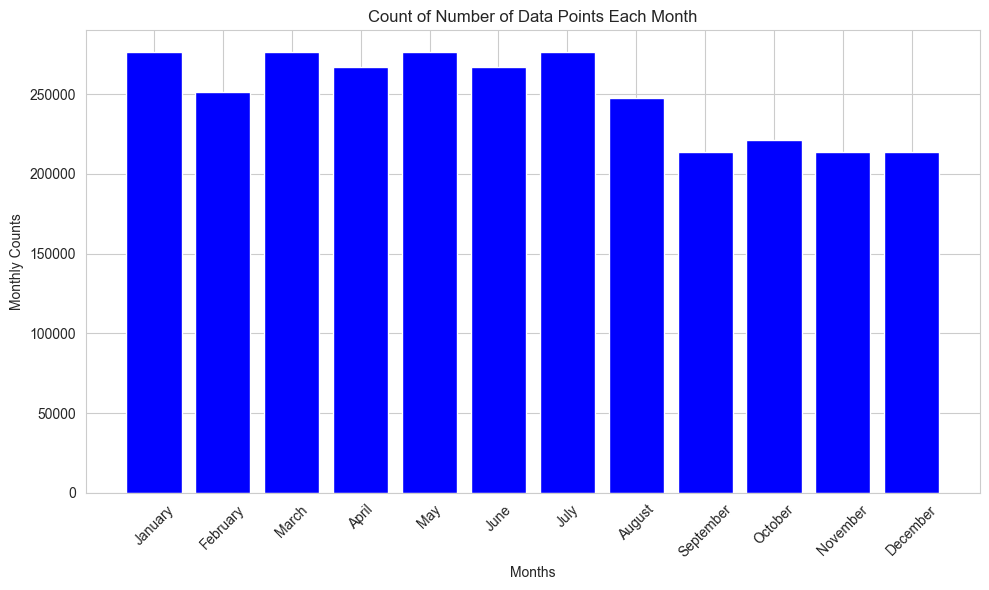

In [9]:
# extracting the month
train_copy['month'] = pd.to_datetime(train_copy['date']).dt.month

# Grouping by month and count the data points
monthly_data = train_copy.groupby('month').size().reset_index(name='counts')

# Renaming the month values for labeling
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_data['month'] = monthly_data['month'].apply(lambda x: month_names[x - 1])

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(monthly_data['month'], monthly_data['counts'], color='blue')
ax.set_title('Count of Number of Data Points Each Month')
ax.set_xlabel('Months')
ax.set_ylabel('Monthly Counts')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

- There is some uniformity in distribution of datapoints across the months

#### Total sales by store

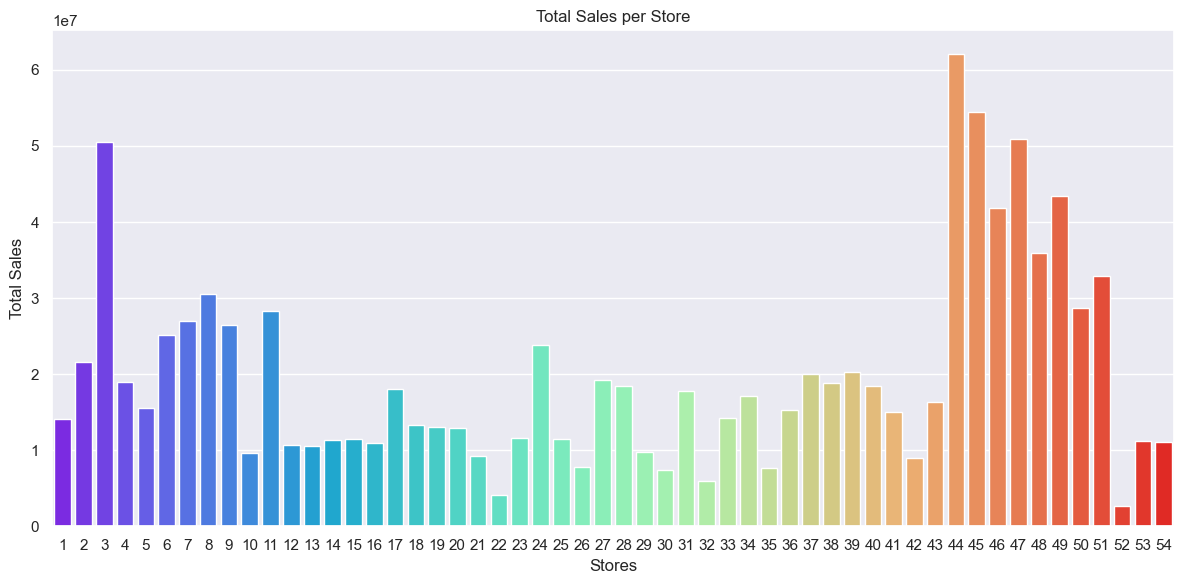

In [10]:
# Filter rows where unit_sales > 0
train_copy = train_copy[train['sales'] > 0]

# Group by 'store_nbr' and calculate the sum of 'unit_sales'
store_unit_sales = train_copy.groupby('store_nbr')['sales'].sum().reset_index()

# Set the figure size
sns.set(rc={'figure.figsize': (12, 6)})

# Create a barplot
sns.barplot(x='store_nbr', y='sales', data=store_unit_sales, palette='rainbow')

# Set titles and labels
plt.title('Total Sales per Store')
plt.xlabel('Stores')
plt.ylabel('Total Sales')

# Show the plot
plt.tight_layout()
plt.show()

- We can say Store number 3,44,45,46,47,48,49, 51 have the highest volume of sales

#### Unit sales daily

In [11]:
# Filter rows where unit_sales > 0
train_copy = train_copy[train_copy['sales'] > 0]

# Group by 'date' and calculate the sum of 'sales'
sales_date_agg = train_copy.groupby('date')['sales'].sum().reset_index()

# Create a lineplot using Plotly Express
fig = px.line(sales_date_agg, x='date', y='sales', title='Plot of Total Sales Over Time (Daily)')
fig.update_layout(width=1200, height=600)

# Add a range slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Show the plot
fig.show()

- upward trend year on year

##### Test data

- The test data, has the same features as the training data, except sales,  which we will predict the target sales for the dates in this file.

- The dates in the test data are for the 15 days after the last date in the training data.

In [12]:
# view first 5 rows
test.head()

id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0

In [13]:
# view info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [14]:
# check for missing values

test.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

##### Transactions Dataset

- Contains date, store_nbr and transaction made on that specific date.

In [15]:
# view first 5 rows
transactions.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

In [16]:
# view info
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [17]:
# check for missing values

transactions.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [18]:
# Visualize transactions over the years with plotly

fig = px.line(transactions, y="transactions",x='date', title="Transaction data over time")

# enable range slider with range selector
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

- Big spikes is transactions in december every year; indicates seasonality

##### Stores Dataset

- Store metadata, including city, state, type, and cluster.

- cluster is a grouping of similar stores.

In [19]:
# view first 5 rows
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [20]:
# view info
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [21]:
# check for missing values

stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

##### Oil Dataset

- Daily oil price which includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices.)

In [22]:
# view first 5 rows
oil.head()

date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20

In [23]:
# view info
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [24]:
# check for missing values

oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

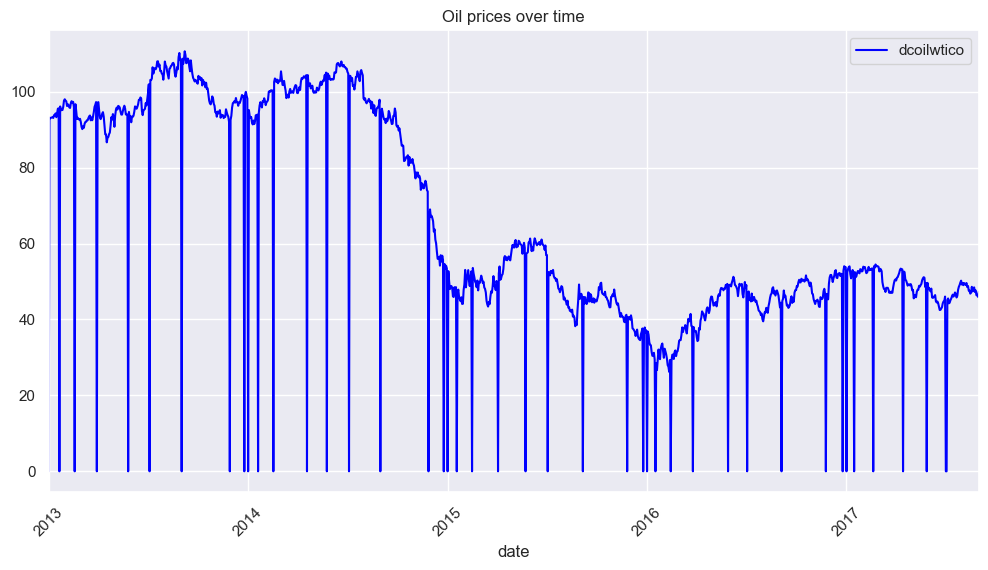

In [25]:
# Oil prices over time

ax = oil.groupby(['date'], as_index=False)["dcoilwtico"].sum().plot(
    "date", "dcoilwtico", figsize=(12,6), title="Oil prices over time", color='blue')

plt.tick_params(axis='x', labelrotation=45)

##### Holiday/Events Dataset

- Holidays and Events, with metadata

NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was celebrated, look for the corresponding row where type is Transfer.

For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.

- Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

In [26]:
# view forst 5 rows
holidays.head()

date     type    locale locale_name                    description  \
0 2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3 2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4 2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [27]:
# view info
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [28]:
# check for missing values

holidays.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

### Analytical Questions

#### 1. Is the train dataset complete (has all the required dates)?

In [29]:
# Check for missing values
if train.isnull().values.any():
  print("The dataset is not complete. There are missing values.")
else:
  print("The dataset is complete.")


The dataset is complete.


- The dataset has no missing value. However let's check the completion of the dates.

##### Date completion

In [30]:
# Checking for completeness of the dates
# Min and max dates (range of dates)

train.date.min(), train.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [31]:
# Actual recorded number of days in train dataset

train['date'].nunique()

1684

In [32]:
# range between min and max dates

min_date = train['date'].min()
max_date = train['date'].max()
days_range = pd.date_range(start=min_date, end=max_date)
num_days = len(days_range)
num_days

1688

In [33]:
expected_dates = pd.date_range(start=min_date, end=max_date)
expected_dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [34]:
# Missing dates

missing_dates = expected_dates.difference(train['date'].unique())
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

- The train dataset is mising 4 dates.These missing dates follow a pattern (december 25th) from 2013-2016. This date is a worldwide holiday, and also a holiday in Ecuador.
- The assumption is that no data was collected on this day every year as the shops may be closed down on christmas each year.

In [35]:
missing_df = list(missing_dates)
print(pd.DataFrame(missing_df))

           0
0 2013-12-25
1 2014-12-25
2 2015-12-25
3 2016-12-25


In [36]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [37]:
# Add missing dates in a DataFrame

new_dates = pd.DataFrame(missing_df, columns = ['date'])
new_dates

date
0 2013-12-25
1 2014-12-25
2 2015-12-25
3 2016-12-25

- let us add the missing dates to the train dataset

In [38]:
train = pd.concat([train, new_dates], ignore_index=False)
train

id       date  store_nbr      family  sales  onpromotion
0               0.00 2013-01-01       1.00  AUTOMOTIVE   0.00         0.00
1               1.00 2013-01-01       1.00   BABY CARE   0.00         0.00
2               2.00 2013-01-01       1.00      BEAUTY   0.00         0.00
3               3.00 2013-01-01       1.00   BEVERAGES   0.00         0.00
4               4.00 2013-01-01       1.00       BOOKS   0.00         0.00
...              ...        ...        ...         ...    ...          ...
3000887 3,000,887.00 2017-08-15       9.00     SEAFOOD  16.00         0.00
0                NaN 2013-12-25        NaN         NaN    NaN          NaN
1                NaN 2014-12-25        NaN         NaN    NaN          NaN
2                NaN 2015-12-25        NaN         NaN    NaN          NaN
3                NaN 2016-12-25        NaN         NaN    NaN          NaN

[3000892 rows x 6 columns]

In [39]:
train.isna().sum()

id             4
date           0
store_nbr      4
family         4
sales          4
onpromotion    4
dtype: int64

- we now have some missing values due to adding missing dates. we will deal with these later on.

#### 2. Which dates have the lowest and highest sales for each year?

In [40]:
# Highest sales date in each year

train_copy['year'] = train_copy['date'].dt.year
max_sales = train_copy.groupby('year')['sales'].idxmax()
Result_max = train.loc[max_sales]
Result_max

id       date  store_nbr     family      sales  onpromotion
562596    562,596.00 2013-11-12      44.00  GROCERY I  46,271.00         0.00
1257246 1,257,246.00 2014-12-08      35.00  GROCERY I  45,361.00         3.00
1916586 1,916,586.00 2015-12-14      35.00  GROCERY I  40,351.46         7.00
2163723 2,163,723.00 2016-05-02       2.00  GROCERY I 124,717.00        59.00
2760297 2,760,297.00 2017-04-02       9.00  GROCERY I  38,422.62        73.00

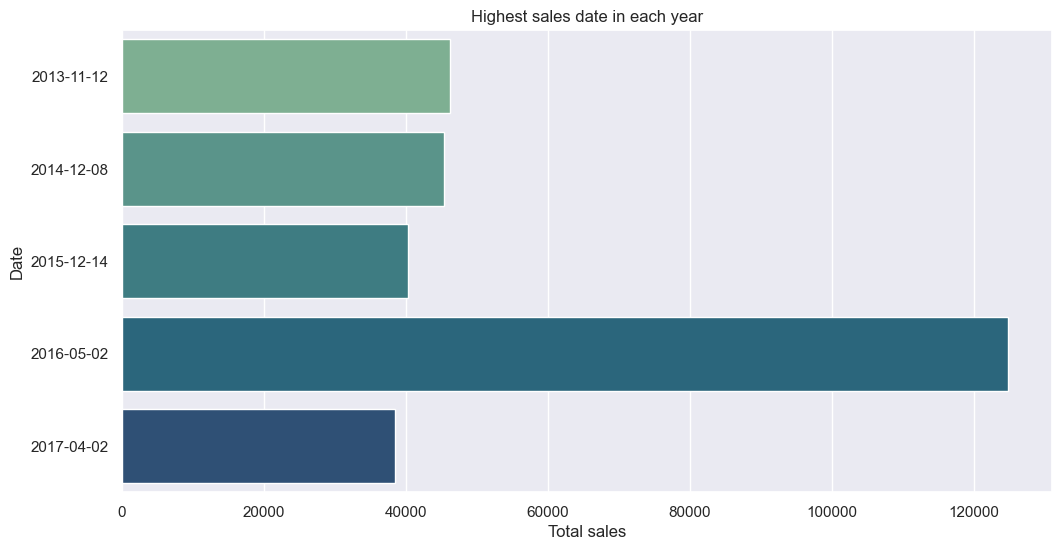

In [41]:
# Horizontal bar chart of dates with highest sales each year

sns.barplot(data=Result_max, y="date", x="sales", palette='crest')
plt.ylabel("Date")
plt.xlabel("Total sales")
plt.title("Highest sales date in each year")
plt.show()

- 2016(11/12) has the highest number of sales (124,717)

In [42]:
# lowest sales date in each year

min_sales = train_copy.groupby('year')['sales'].idxmin()
Result_min = train.loc[min_sales]
Result_min

id       date  store_nbr   family  sales  onpromotion
387782    387,782.00 2013-08-06      39.00  SEAFOOD   0.12         0.00
1252052 1,252,052.00 2014-12-05      39.00  SEAFOOD   0.19         0.00
1756358 1,756,358.00 2015-09-15      39.00  SEAFOOD   0.20         0.00
2256638 2,256,638.00 2016-06-23      26.00  SEAFOOD   0.40         1.00
2666498 2,666,498.00 2017-02-09      26.00  SEAFOOD   0.43         0.00

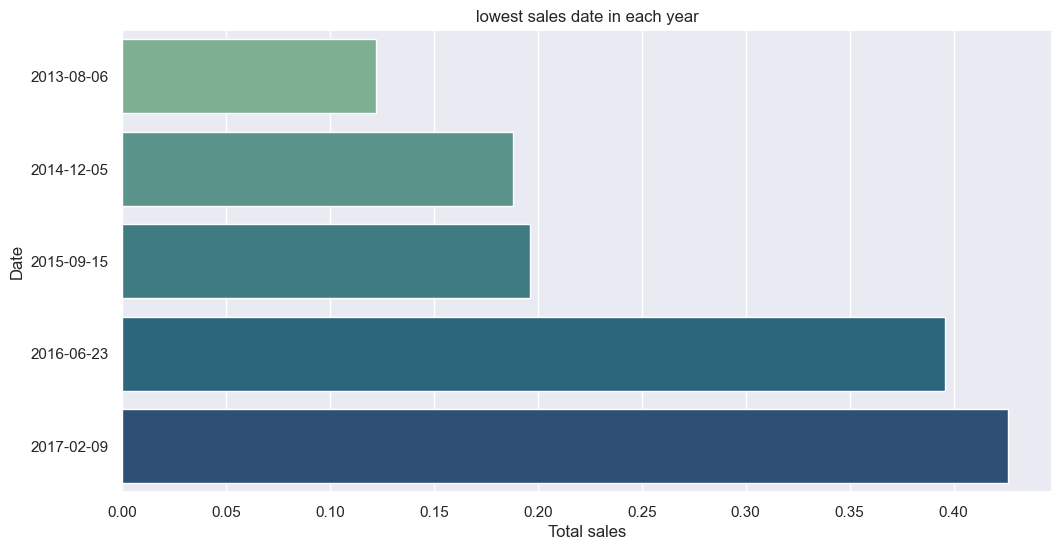

In [43]:
# Horizontal bar chart of dates with lowest sales each year

sns.barplot(data=Result_min, y="date", x="sales", palette='crest')
plt.ylabel("Date")
plt.xlabel("Total sales")
plt.title("lowest sales date in each year")
plt.show()

- 2013(08/06) has the lowest number of sales (0.12)

#### 3. Did the earthquake impact sales?

The 2016 Ecuador earthquake occurred on April 16 at 18:58:37 ECT with a moment magnitude of 7.8

In [44]:
# Set the 'date' column as the index

train_copy.set_index('date', inplace=True)

# Resample to weekly frequency, aggregating with mean

sales_daily_mean = train_copy["sales"].resample('D').mean()
sales_weekly_mean = train_copy["sales"].resample('W').mean()

Text(0.5, 1.0, 'April and May 2016 total sales')

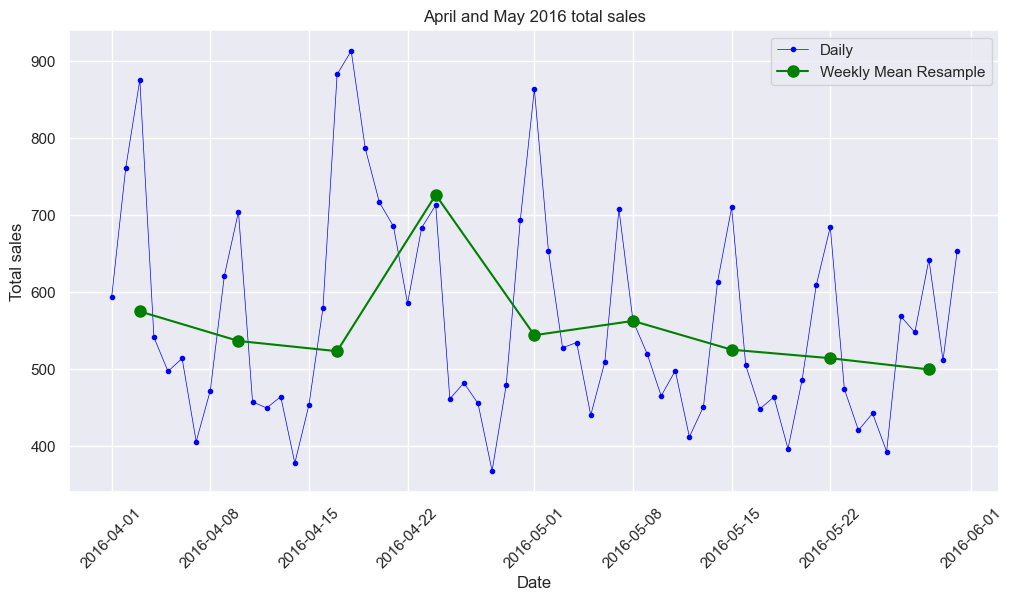

In [45]:
# Sales for April to May 2016.
start, end = '2016-04', '2016-05'

# Analyse before and after the earthquake

fig, ax = plt.subplots(figsize=(12,6))

color_daily = 'blue'
color_weekly = 'green'

ax.plot(sales_daily_mean.loc[start:end], marker='.', linestyle='-', linewidth=0.5, label='Daily', color=color_daily)
ax.plot(sales_weekly_mean.loc[start:end], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample', color=color_weekly)
ax.set_ylabel("Total sales")
ax.set_xlabel("Date")
ax.tick_params(axis='x', labelrotation=45)
ax.legend()
ax.set_title("April and May 2016 total sales")

In the week of the earthquake (from April 14th to April 21st), daily and weekly sales increased during this week, reaching a peak on the days after the earthquake (18th), but then experienced a sharp decline the next 4 days following the earthquake, returning to normalcy.

#### 4. Are certain groups of stores selling more products? (Cluster, city, state, type)

In [46]:
# Merge train and stores datasets

train_stores = pd.merge(train, stores)

train_stores.head()

id       date  store_nbr      family  sales  onpromotion   city  \
0 0.00 2013-01-01       1.00  AUTOMOTIVE   0.00         0.00  Quito   
1 1.00 2013-01-01       1.00   BABY CARE   0.00         0.00  Quito   
2 2.00 2013-01-01       1.00      BEAUTY   0.00         0.00  Quito   
3 3.00 2013-01-01       1.00   BEVERAGES   0.00         0.00  Quito   
4 4.00 2013-01-01       1.00       BOOKS   0.00         0.00  Quito   

       state type  cluster  
0  Pichincha    D       13  
1  Pichincha    D       13  
2  Pichincha    D       13  
3  Pichincha    D       13  
4  Pichincha    D       13

#### Store sales by cluster

In [47]:
# Sum of sales by cluster

sales_clusters = train_stores.groupby("cluster", as_index=False)["sales"].sum()
sales_clusters.sort_values(by='sales', ascending=False)

cluster          sales
13       14 157,430,523.08
5         6 114,254,386.74
7         8 107,928,246.70
10       11 100,614,275.93
9        10  85,324,430.43
2         3  75,628,703.46
12       13  72,102,248.79
4         5  62,087,553.25
14       15  55,296,949.37
0         1  54,376,751.96
3         4  49,443,442.97
16       17  32,911,489.54
8         9  30,561,081.05
1         2  28,916,403.50
11       12  18,030,969.25
6         7  15,478,120.49
15       16  13,259,375.69

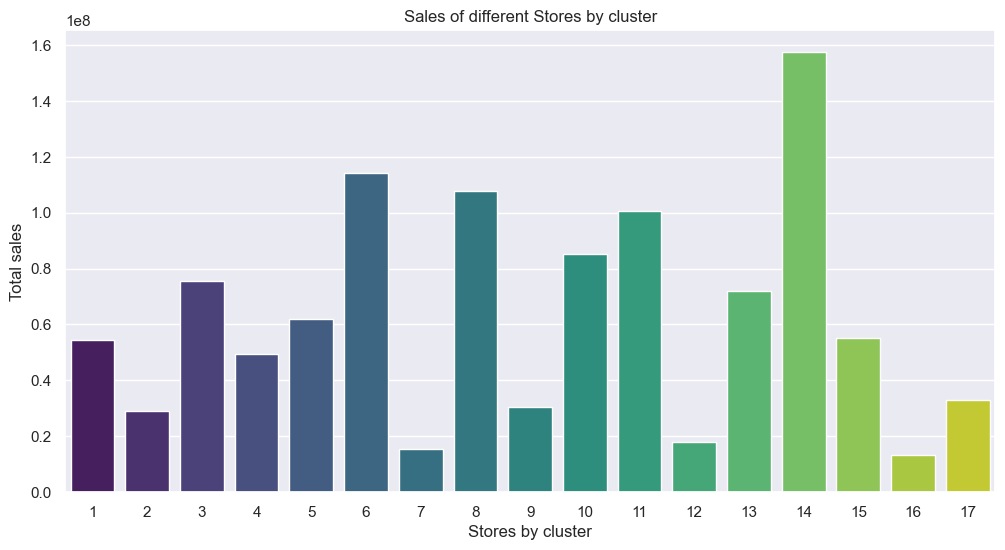

In [48]:
# vertical Bar chart of sales by cluster

ax = sns.barplot(data=sales_clusters, x = "cluster", y = "sales", palette='viridis')
plt.xlabel("Stores by cluster")
plt.ylabel("Total sales")
plt.title("Sales of different Stores by cluster")
plt.show()

- cluster 14 has the highest sales. cluster 16 has the lowest sales.

#### Store sales by city

In [49]:
# Sum of sales by city

sales_city = train_stores.groupby("city", as_index=False)["sales"].sum()
sales_city.sort_values(by='sales', ascending=False)

city          sales
18          Quito 556,741,836.83
8       Guayaquil 122,967,260.48
3          Cuenca  49,168,596.03
0          Ambato  40,304,401.30
21  Santo Domingo  35,834,323.04
13        Machala  33,386,796.54
2         Cayambe  28,325,558.48
10      Latacunga  21,182,263.78
4           Daule  19,188,021.38
12           Loja  18,859,999.26
1        Babahoyo  17,746,872.70
6      Esmeraldas  16,391,692.21
11       Libertad  15,322,431.10
17        Quevedo  14,178,501.29
14          Manta  13,912,337.02
7        Guaranda  13,049,509.84
9          Ibarra  11,451,270.02
20        Salinas  11,420,997.87
19       Riobamba  11,387,918.75
5       El Carmen  11,057,483.12
15         Playas   7,676,679.42
16           Puyo   4,090,201.74

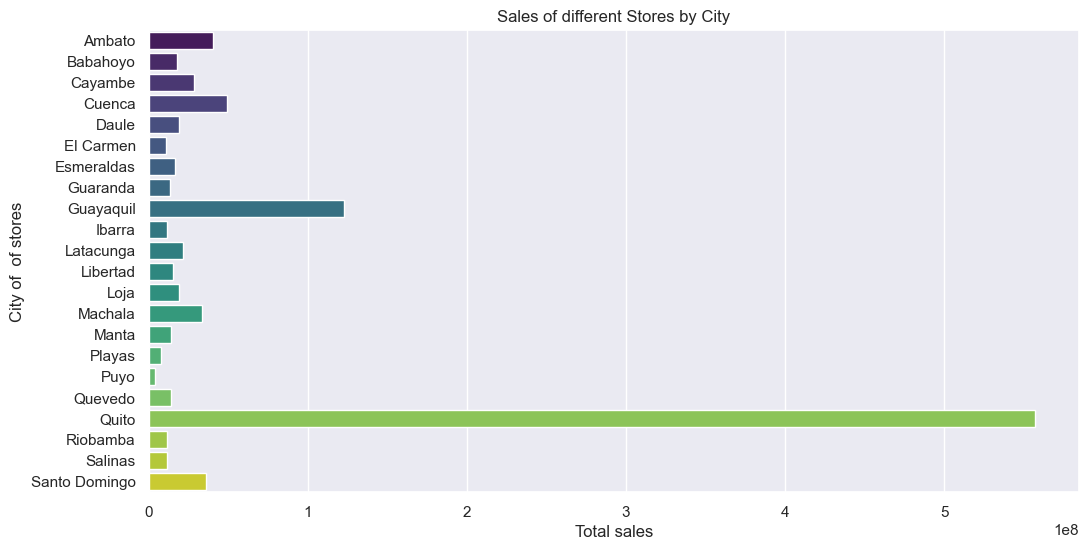

In [50]:
# horizontal Bar chart of sales by city

sns.barplot(data=sales_city, y = "city", x = "sales", palette='viridis')
plt.ylabel("City of  of stores")
plt.xlabel("Total sales")
plt.title("Sales of different Stores by City")
plt.show()

- Quito has the highest total sales, as it is the capital, and Puyo the lowest

#### Store sales by state

In [51]:
# Sum of sales by state

sales_state = train_stores.groupby("state", as_index=False)["sales"].sum()
sales_state.sort_values(by='sales', ascending=False)

state          sales
12                       Pichincha 585,067,395.31
6                           Guayas 165,154,392.38
0                            Azuay  49,168,596.03
15                      Tungurahua  40,304,401.30
14  Santo Domingo de los Tsachilas  35,834,323.04
4                           El Oro  33,386,796.54
9                         Los Rios  31,925,373.99
10                          Manabi  24,969,820.13
3                         Cotopaxi  21,182,263.78
8                             Loja  18,859,999.26
5                       Esmeraldas  16,391,692.21
1                          Bolivar  13,049,509.84
7                         Imbabura  11,451,270.02
13                     Santa Elena  11,420,997.87
2                       Chimborazo  11,387,918.75
11                         Pastaza   4,090,201.74

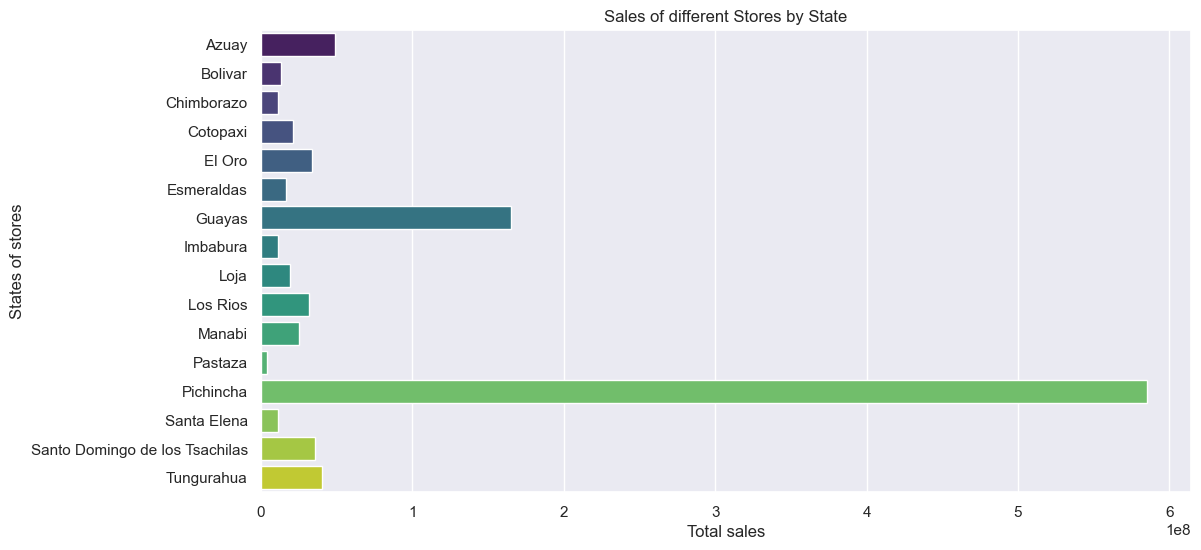

In [52]:
# horizontal Bar chart of sales by state

sns.barplot(data=sales_state, y = "state", x = "sales", palette='viridis')
plt.ylabel("States of stores")
plt.xlabel("Total sales")
plt.title("Sales of different Stores by State")
plt.show()

- Pichincha has the highest total sales
- Pastaza has the lowest total sales

#### Store sales by type

In [53]:
# Sum of sales by store type

sales_type = train_stores.groupby("type", as_index=False)["sales"].sum()
sales_type.sort_values(by='sales', ascending=False)

type          sales
0    A 353,043,841.80
3    D 351,083,296.86
2    C 164,434,742.56
1    B 145,260,635.13
4    E  59,822,435.84

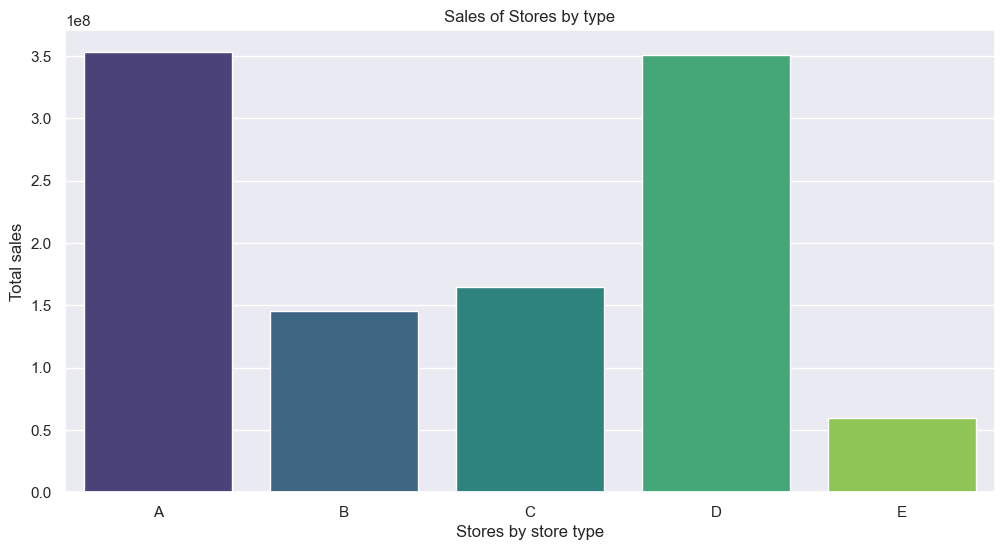

In [54]:
# vertical Bar chart of sales by store type

sns.barplot(data=sales_type, x = "type", y = "sales", palette='viridis')
plt.xlabel("Stores by store type")
plt.ylabel("Total sales")
plt.title("Sales of Stores by type")
plt.show()

- type A nd D have the highest total sales

#### 5. Are sales affected by promotions, oil prices and holidays?

##### Sales and promotions

In [55]:
# check unique values product family

train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD', nan], dtype=object)

In [56]:
# Filter rows with promotions and sum sales for top 10 families
promotions = train_copy[train_copy["onpromotion"] != 0].groupby("family")["sales"].sum().sort_values(ascending=False).head(10)

# Filter rows without promotions and sum sales for top 10 families
no_promotions = train_copy[train_copy["onpromotion"] == 0].groupby("family")["sales"].sum().sort_values(ascending=False).head(10)


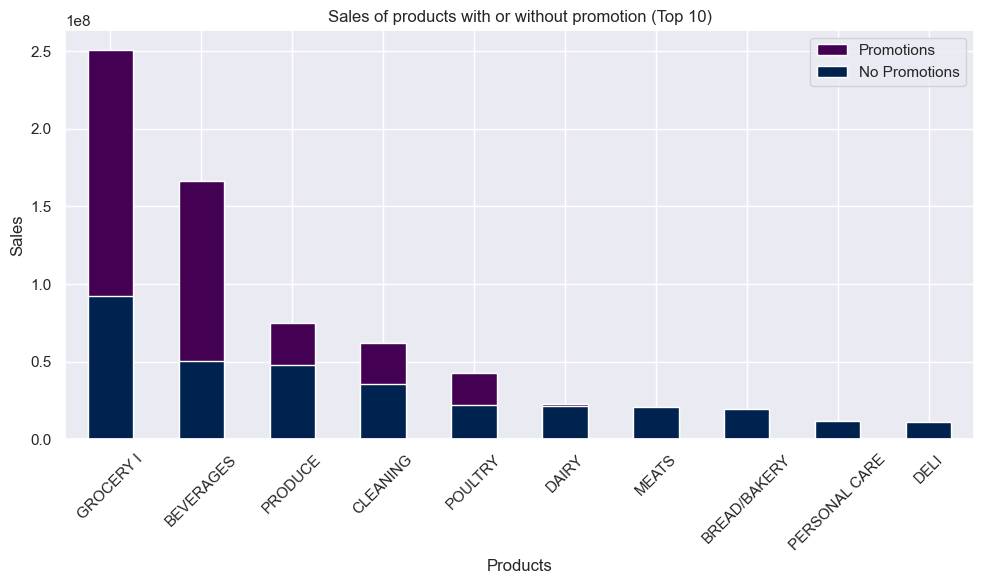

In [57]:
# Create stacked bar chart to visualize sales on and off promotions

ax = promotions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
no_promotions.plot(kind='bar', stacked=True, ax=ax, colormap='cividis')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend(["Promotions", "No Promotions"])

# Label the axes and title
plt.ylabel("Sales")
plt.xlabel("Products")
plt.title("Sales of products with or without promotion (Top 10)")

plt.tight_layout()
plt.show()

- promotions increases sales for most common purchased items in groceries and beverages category.

##### Sales and oil prices

In [58]:
# merge train and oil dataset

merge = train_copy.merge(
    oil, 
    how='left', 
    on=['date'])
    
merge.reset_index()
merge.head()

date   id  store_nbr        family  sales  onpromotion  year  month  \
0 2013-01-01  563         25        BEAUTY   2.00            0  2013      1   
1 2013-01-01  564         25     BEVERAGES 810.00            0  2013      1   
2 2013-01-01  566         25  BREAD/BAKERY 180.59            0  2013      1   
3 2013-01-01  568         25      CLEANING 186.00            0  2013      1   
4 2013-01-01  569         25         DAIRY 143.00            0  2013      1   

   dcoilwtico  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

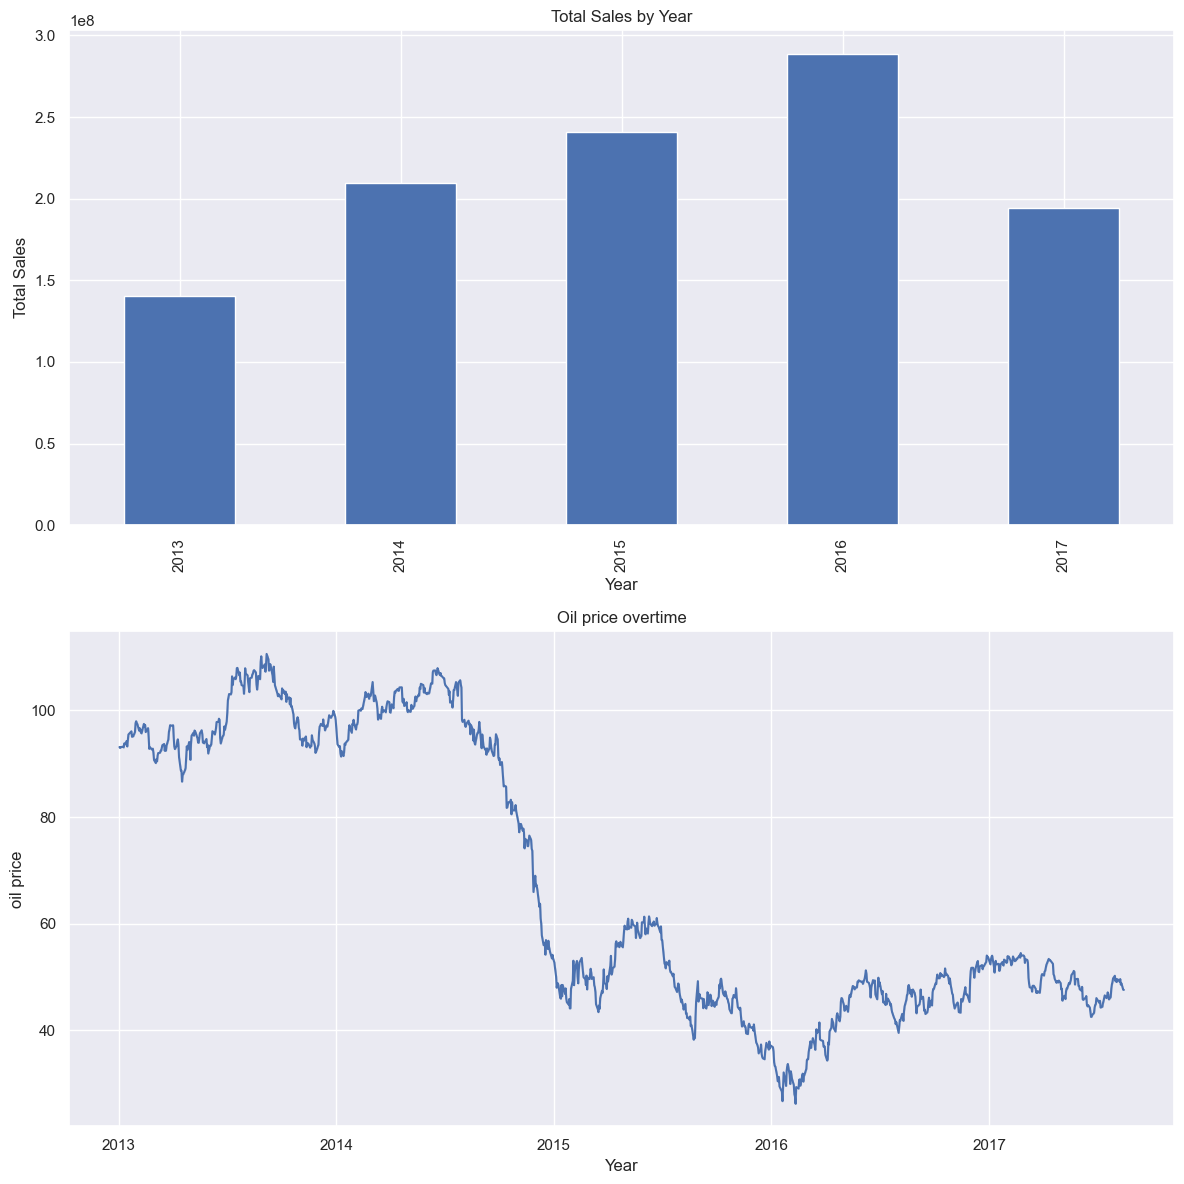

In [59]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the average sales by year 
merge.groupby(['year'])['sales'].sum().plot.bar(ax=ax1, title='Total Sales by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Sales')

# Plot the oil data overtime
sns.lineplot(data=merge, x='date', y='dcoilwtico', ax=ax2)
ax2.set_title('Oil price overtime')
ax2.set_xlabel('Year')
ax2.set_ylabel('oil price')

plt.tight_layout()
plt.show()


Let's see if there is any correlation

In [60]:
# Determine the correlation between sales and oil prices

correlation = merge['sales'].corr(merge['dcoilwtico'])
print(correlation)

-0.03011995601864045


- Very weak and almost negligible negative correlation between sales and oil prices over time
- Other factors are likely more influential in determining sales than oil prices

##### Sales and holidays

In [61]:
# unique values in holidays column

holidays['type'].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

In [62]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [63]:
# merge train and holidays dataset

merge_2 = train_copy.merge(
    holidays, 
    how='left', 
    on=['date'])
    
merge_2.reset_index()
merge_2.head()

date   id  store_nbr        family  sales  onpromotion  year  month  \
0 2013-01-01  563         25        BEAUTY   2.00            0  2013      1   
1 2013-01-01  564         25     BEVERAGES 810.00            0  2013      1   
2 2013-01-01  566         25  BREAD/BAKERY 180.59            0  2013      1   
3 2013-01-01  568         25      CLEANING 186.00            0  2013      1   
4 2013-01-01  569         25         DAIRY 143.00            0  2013      1   

      type    locale locale_name         description transferred  
0  Holiday  National     Ecuador  Primer dia del ano       False  
1  Holiday  National     Ecuador  Primer dia del ano       False  
2  Holiday  National     Ecuador  Primer dia del ano       False  
3  Holiday  National     Ecuador  Primer dia del ano       False  
4  Holiday  National     Ecuador  Primer dia del ano       False

In [64]:
merge_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100607 entries, 0 to 2100606
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   id           int64         
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int32         
 7   month        int32         
 8   type         object        
 9   locale       object        
 10  locale_name  object        
 11  description  object        
 12  transferred  object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(3), object(6)
memory usage: 192.3+ MB


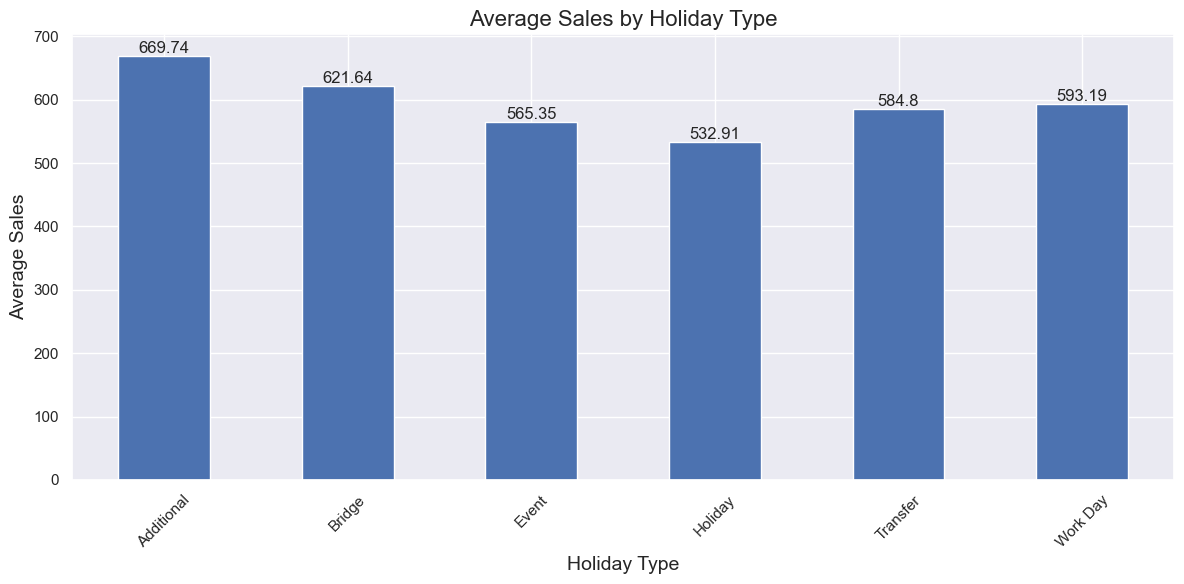

In [65]:
# Group the data by holiday type and calculate the average sales for each type
avg_sales_by_type = merge_2.groupby("type").agg({"sales": "mean"})

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot a bar chart of the average sales by holiday type
avg_sales_by_type.plot(kind="bar", y="sales", ax=ax, legend=False)

# Add labels to the bars
for index, value in enumerate(avg_sales_by_type["sales"]):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=12)

# Add a title and labels
ax.set_title("Average Sales by Holiday Type", fontsize=16)
ax.set_xlabel("Holiday Type", fontsize=14)
ax.set_ylabel("Average Sales", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Additional holidays have the highest average sales. However, holiday type barely has an effect on sales

#### 6. What analysis can we get from the date and its extractable features?

In [66]:
# Function to extract features from date column

def getDateFeatures(df, date):
    df['date'] = pd.to_datetime(df[date])
    df['month'] = df['date'].dt.month
    df['Month'] = df['date'].dt.month_name()
    df['Day'] = df['date'].dt.day_name()
    df['day_of_month'] = df['date'].dt.day
    df['day_of_year'] = df['date'].dt.dayofyear
    df['week_of_year'] = df['date'].dt.isocalendar().week
    df['day_of_week'] = df['date'].dt.dayofweek
    df['year'] = df['date'].dt.year
    df["is_weekend"] = np.where(df['day_of_week'] > 4, 1, 0)
    df['quarter'] = df['date'].dt.quarter
    return df

In [67]:
# run our train data through our function

train_copy = train_copy.reset_index()
train_data = getDateFeatures(train_copy, "date")
train_data.head()

date   id  store_nbr        family  sales  onpromotion  year  month  \
0 2013-01-01  563         25        BEAUTY   2.00            0  2013      1   
1 2013-01-01  564         25     BEVERAGES 810.00            0  2013      1   
2 2013-01-01  566         25  BREAD/BAKERY 180.59            0  2013      1   
3 2013-01-01  568         25      CLEANING 186.00            0  2013      1   
4 2013-01-01  569         25         DAIRY 143.00            0  2013      1   

     Month      Day  day_of_month  day_of_year  week_of_year  day_of_week  \
0  January  Tuesday             1            1             1            1   
1  January  Tuesday             1            1             1            1   
2  January  Tuesday             1            1             1            1   
3  January  Tuesday             1            1             1            1   
4  January  Tuesday             1            1             1            1   

   is_weekend  quarter  
0           0        1  
1           0        1  
2           0        1  
3           0        1  
4           0        1

##### Sales on Pay Day (Semi-Monthly)

In [68]:
# list with semi monthly pay day range (15th and last day 30/31st of the month)

pay_day = pd.date_range(start=train_data.date.min(), end=train_data.date.max(), freq='SM').astype('str').tolist()

In [69]:
# create payday column

train_data["pay_day"] = np.where(train_data["date"].isin(pay_day), 1, 0)
train_data['pay_day'].value_counts()

pay_day
0    1925095
1     136663
Name: count, dtype: int64

- We will get the average sales to see wether there is a difference in payday sales and other sales

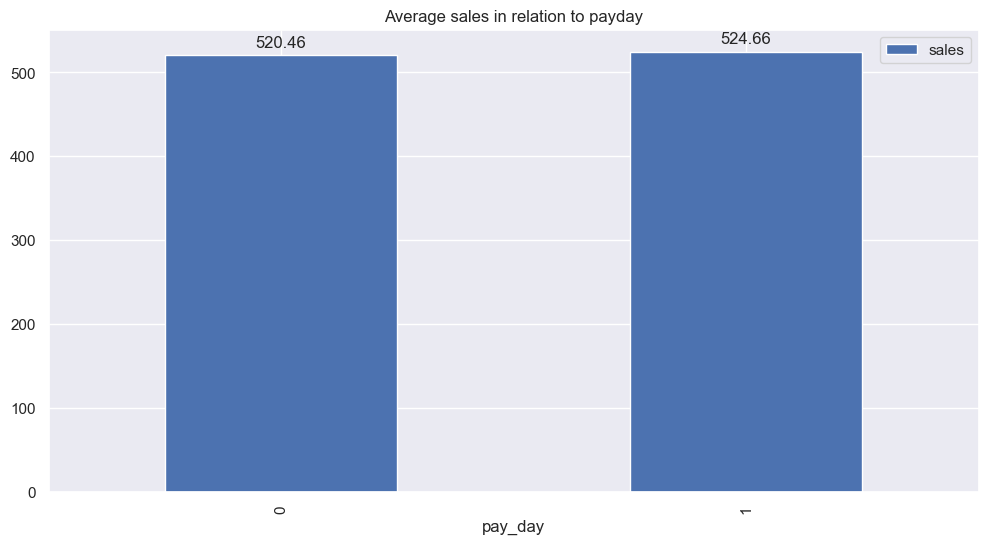

In [70]:
# Plot the average sales in relation to payday

ax = train_data.groupby(["pay_day"], as_index=False)['sales'].mean()\
                                    .plot("pay_day", "sales", kind="bar", figsize=(12,6),
                                         title="Average sales in relation to payday")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')


- Average payday sales are slightly higher than non-payday sales

##### Sales by day of the month

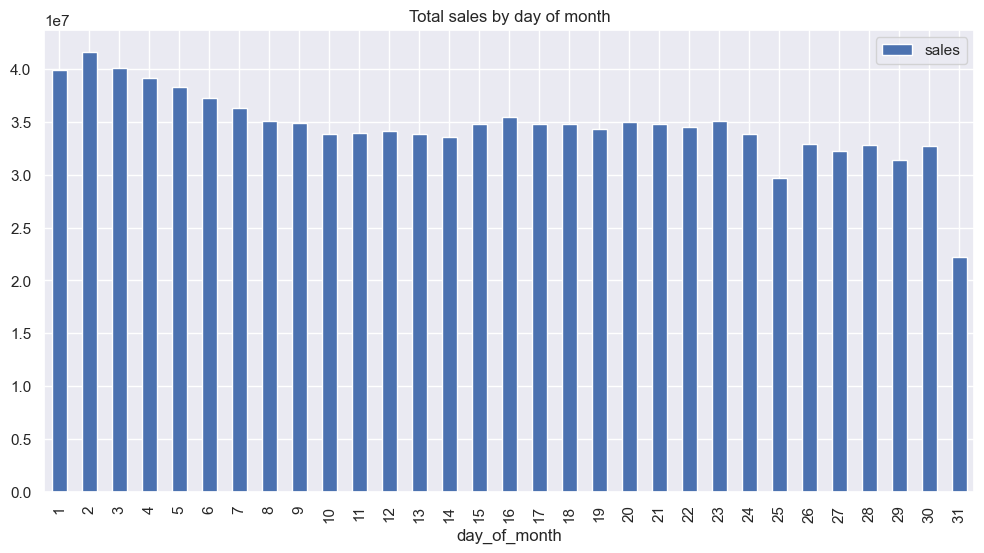

In [71]:
# plot the sum of sales by day of the month
# which day of the month has the most sales?

ax = train_data.groupby(["day_of_month"], as_index=False)["sales"].sum()\
                                    .plot("day_of_month", "sales", kind="bar", figsize=(12,6),
                                         title="Total sales by day of month")

- Beginning of the month has high sales (1st - 3rd), with a gradual decline afterwards, but there is an overall uniform trend.

##### Sales by week of the year

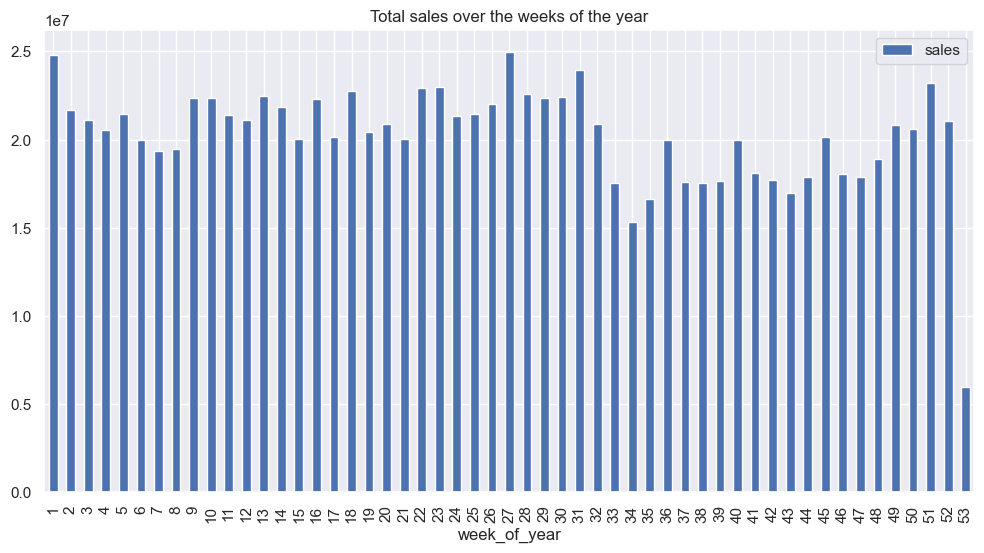

In [72]:
# plot the sum of sales by the weeks of the year

sales_by_week = train_data.groupby(["week_of_year"], as_index=False)['sales'].sum()

ax = sales_by_week.plot("week_of_year", "sales", kind="bar", figsize=(12, 6),
                         title="Total sales over the weeks of the year")

- First week and mid year (week 27) have the highest sales

##### Sales by month

In [73]:
# group the sum of sales by month of the year
# which month has the highest sales?

purchase_month = train_data.groupby("Month", as_index=False)["sales"].sum().sort_values(by="sales", ascending=False)
purchase_month = purchase_month.reset_index(drop=True)
purchase_month

Month          sales
0        July 103,363,060.69
1       March  97,228,487.15
2    December  97,027,840.76
3        June  94,516,703.29
4     January  94,442,152.32
5         May  94,399,137.02
6       April  90,668,117.56
7      August  83,472,376.84
8    February  80,637,229.44
9    November  80,335,788.06
10    October  80,080,379.16
11  September  77,473,679.92

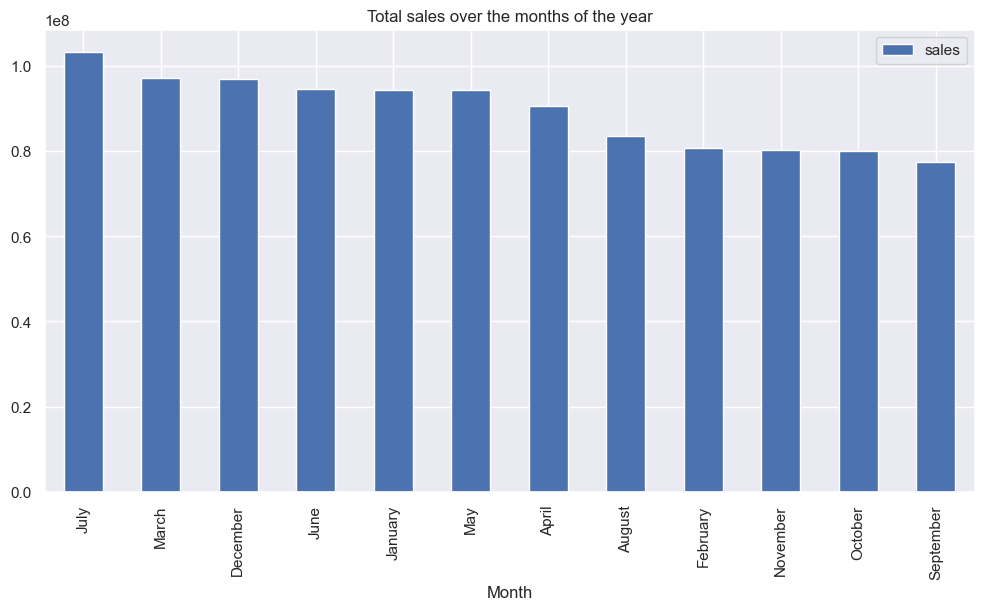

In [74]:
# plot the sum of sales by month of the year

ax = purchase_month.plot("Month", "sales", kind="bar", figsize=(12, 6),
                         title="Total sales over the months of the year")

- July(Summer) has the highest sales, followed by march (probaly easter), and december

##### Sales by Day of the week

In [75]:
# group the sum of sales by day of the week
# which day has the highest sales?

purchase_day = train_data.groupby("Day", as_index=False)["sales"].sum().sort_values(by="sales", ascending=False)
purchase_day = purchase_day.reset_index(drop=True)
purchase_day

Day          sales
0     Sunday 198,052,349.18
1   Saturday 186,101,548.14
2     Monday 148,827,793.85
3  Wednesday 142,378,692.83
4     Friday 139,097,846.66
5    Tuesday 137,922,113.28
6   Thursday 121,264,608.27

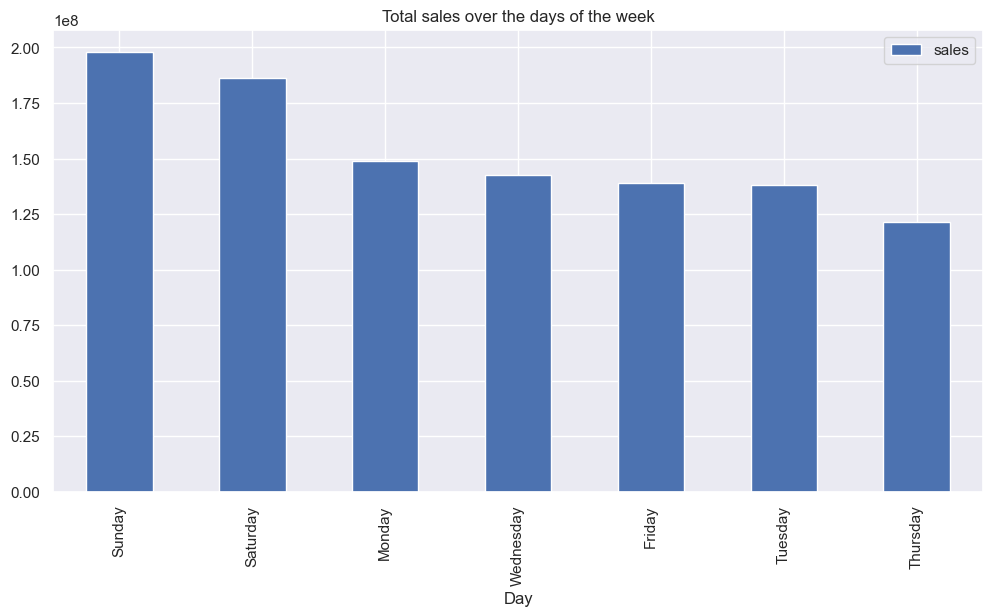

In [76]:
# plot the sum of sales by day of the week

ax = purchase_day.plot("Day", "sales", kind="bar", figsize=(12, 6),
                         title="Total sales over the days of the week")

- Sunday and saturday (weekends) have the highest sales

##### Sales by season

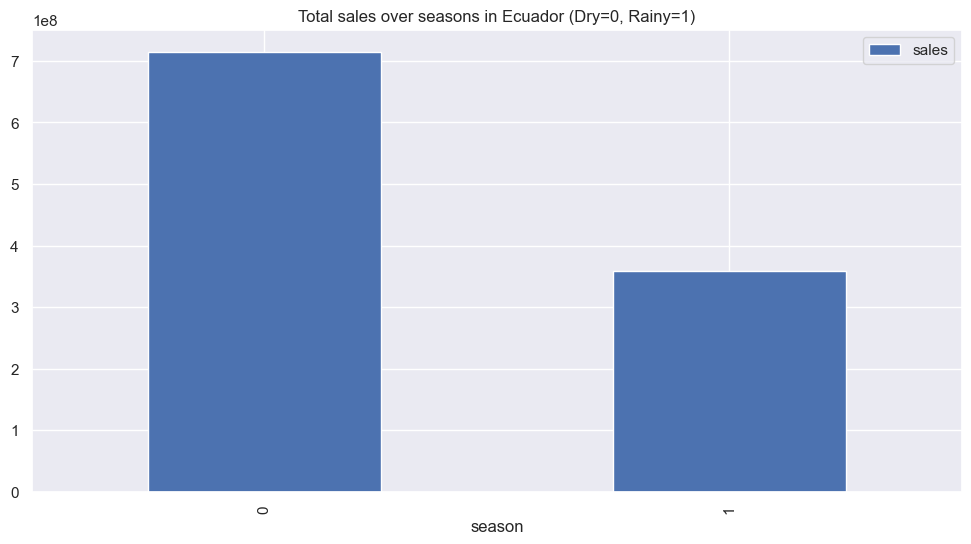

In [77]:
# create column for rainy and dry season

train_data["season"] = np.where(train_data["month"].isin([6,7,8,9]), 1, 0)

# plot sum of sales by season of the year (Dry or Rainy)
sales_by_season = train_data.groupby(["season"], as_index=False)['sales'].sum()

ax = sales_by_season.plot("season", "sales", kind="bar", figsize=(12, 6),
                          title="Total sales over seasons in Ecuador (Dry=0, Rainy=1)")


- Tropical countries like Ecuador have 2 seasons (Dry and rainy)
- Dry season has higher sales compared to rainy season

##### Sales by quarter

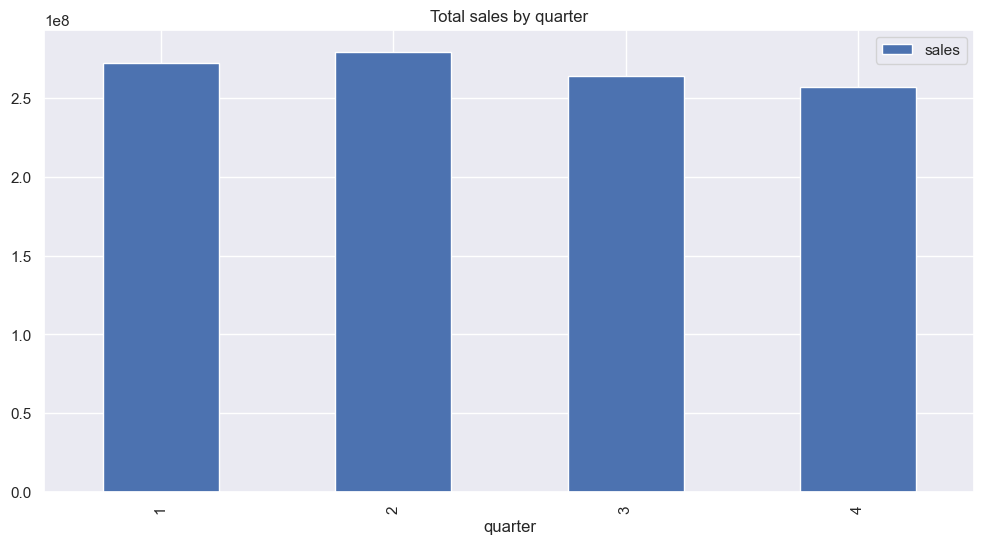

In [78]:
# plot the sum of sales by quarter of the year

sales_by_quarter = train_data.groupby(["quarter"], as_index=False)['sales'].sum()

ax = sales_by_quarter.plot("quarter", "sales", kind="bar", figsize=(12, 6),
                          title="Total sales by quarter")

#### 7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

- MSE( Mean Squared Error) is a widely used metric for regression problems.
It measures the average of the squared differences between predicted and actual values.
MSE is sensitive to outliers because it squares the differences.

- RMSE (Root Mean Squared Error) is the square root of the MSE.
It's often used because it has the same unit of measurement as the target variable, which makes it more interpretable.
RMSE treats all errors equally.

- RMSLE (Root Mean Squared Logarithmic Error) is commonly used when you want to penalize underpredictions more than overpredictions and when the target variable has a wide range.
It first takes the natural logarithm of the predicted and actual values and then computes the RMSE of those log values. RMSLE takes the logarithm of the values before computing the error, which can be useful when dealing with skewed data or when you want to give less weight to large errors for large values

-  MSE is greater because it is calculated as the average of the squared differences between predicted and actual values. When you square the differences between predicted and actual values, even small errors get larger because negative differences (i.e., underpredictions) become positive. Large errors, in particular, contribute significantly to the MSE

#### Hypothesis testing

**Null Hypothesis (H0)**:
"There is no significant relationship between store sales and promotions."

**Alternative Hypothesis (Ha)**:
"There is a significant relationship between store sales and promotions."

In [79]:
# encode categorical features

train_copy['onpromotion_encoded'] = np.where(train_copy['onpromotion'] >= 1, 1, 0)
train_copy['onpromotion_encoded'].value_counts()

onpromotion_encoded
0    1450446
1     611312
Name: count, dtype: int64

##### T-test

The t-test is a statistical hypothesis test that assesses whether the means of two groups are significantly different from each other (an independent two-sample t-test)

In [80]:
# Extract the sales of products when they are on promotion and when they are not
sales_on_promotion = train_copy[train_copy['onpromotion_encoded'] == 1]['sales']
sales_not_on_promotion = train_copy[train_copy['onpromotion_encoded'] == 0]['sales']

# Calculate the sample sizes
n1 = len(sales_on_promotion)
n2 = len(sales_not_on_promotion)

# Calculate the degrees of freedom
degrees_of_freedom = n1 + n2 - 2  # Assuming equal variances, subtract 2 for two samples

# Set the significance level
alpha = 0.05

# Calculate the critical t-values for a two-tailed test
critical_t_value = t.ppf(1 - alpha / 2, degrees_of_freedom)

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(sales_on_promotion, sales_not_on_promotion)

# Print the t-statistic, p-value, degrees of freedom, and critical t-values
print("t-statistic:", t_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", degrees_of_freedom)
print(f"Critical t-value (α = {alpha/2}):", -critical_t_value)  # Left tail
print(f"Critical t-value (α = {alpha/2}):", critical_t_value)   # Right tail

# Check if the absolute t-statistic falls within the critical value range
if t_stat >= -critical_t_value and t_stat <= critical_t_value:
    print("\nThe absolute t-statistic falls within the critical value range.")
else:
    print("\nThe absolute t-statistic does not fall within the critical value range.")


t-statistic: 466.1532931598274
p-value: 0.0
Degrees of Freedom: 2061756
Critical t-value (α = 0.025): -1.9599651351478848
Critical t-value (α = 0.025): 1.9599651351478848

The absolute t-statistic does not fall within the critical value range.


- There is a statistically significant difference in sales between products when they are on promotion and when they are not on promotion (p-value < 0.05) and the t-statistic does not fall within the critical value range
- We have strong evidence to **reject the null hypothesis!!**

##### Chi-Squared contingency test

- The chi-squared statistic measures the strength of the association or dependence between the two categorical variables

In [81]:
# Create contingency table
contingency_table = pd.crosstab(train_copy['onpromotion_encoded'], train_copy['sales'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-squared statistic: ", chi2)
print("p-value: ", p)

Chi-squared statistic:  853431.6902295031
p-value:  0.0


- This indicates a strong association between the onpromotion and sales.

## 3. Data Preparation

##### Data Issues

- Deal with missing vales after merging, creating new features and adding missing dates
- Rename a few columns to be more readable
- Ensure dtypes are correct for each column

In [82]:
# shape overview to doubleckeck

train.shape, test.shape

((3000892, 6), (28512, 5))

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000892 entries, 0 to 3
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           float64       
 1   date         datetime64[ns]
 2   store_nbr    float64       
 3   family       object        
 4   sales        float64       
 5   onpromotion  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 224.8+ MB


In [84]:
# check for duplicates

train.duplicated().any(), 
stores.duplicated().any(), 
oil.duplicated().any(),  
test.duplicated().any(),  
holidays.duplicated().any(),
transactions.duplicated().any()

False

In [85]:
# check for missing values in train data
# we know our test data doesn't have any missing values

train.isna().sum()

id             4
date           0
store_nbr      4
family         4
sales          4
onpromotion    4
dtype: int64

- we have some missing values, since we added missing dates

In [86]:
# Sort the merged DataFrame by date
train = train.sort_values('date')
# Resetting the index
train = train.reset_index(drop=True)
train.head()

id       date  store_nbr        family  sales  onpromotion
0     0.00 2013-01-01       1.00    AUTOMOTIVE   0.00         0.00
1 1,194.00 2013-01-01      42.00   CELEBRATION   0.00         0.00
2 1,193.00 2013-01-01      42.00  BREAD/BAKERY   0.00         0.00
3 1,192.00 2013-01-01      42.00         BOOKS   0.00         0.00
4 1,191.00 2013-01-01      42.00     BEVERAGES   0.00         0.00

In [87]:
# Performing backfill interpolation on the merged DataFrame
train = train.interpolate(method='bfill')

In [88]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [89]:
train['date'].nunique()

1688

#### Oil Data

In [90]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [91]:
# we had some missing values in the oil dataset

oil['dcoilwtico'].isna().sum()

43

In [92]:
#percentage of the missing data
(oil.isna().sum()*100)/len(oil)

date         0.00
dcoilwtico   3.53
dtype: float64

In [93]:
# Checking for completeness of the dates
# Min and max dates (range of dates)

oil.date.min(), oil.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [94]:
oil_date_range = pd.date_range(start=oil['date'].min(),end=oil['date'].max())
missing_oil_dates = set(oil_date_range.date) - set(oil['date'].unique())
missing_oil_dates

{datetime.date(2014, 8, 1),
 datetime.date(2016, 3, 29),
 datetime.date(2014, 3, 23),
 datetime.date(2016, 12, 31),
 datetime.date(2014, 2, 5),
 datetime.date(2013, 2, 11),
 datetime.date(2015, 3, 13),
 datetime.date(2013, 5, 10),
 datetime.date(2015, 9, 21),
 datetime.date(2016, 11, 11),
 datetime.date(2017, 3, 8),
 datetime.date(2013, 7, 25),
 datetime.date(2016, 6, 19),
 datetime.date(2016, 7, 8),
 datetime.date(2013, 11, 16),
 datetime.date(2015, 1, 23),
 datetime.date(2017, 6, 24),
 datetime.date(2014, 2, 20),
 datetime.date(2017, 1, 12),
 datetime.date(2016, 7, 17),
 datetime.date(2015, 4, 2),
 datetime.date(2016, 2, 14),
 datetime.date(2017, 7, 29),
 datetime.date(2013, 10, 31),
 datetime.date(2015, 9, 5),
 datetime.date(2013, 3, 12),
 datetime.date(2015, 7, 29),
 datetime.date(2017, 5, 14),
 datetime.date(2016, 4, 28),
 datetime.date(2015, 1, 14),
 datetime.date(2013, 4, 8),
 datetime.date(2015, 7, 11),
 datetime.date(2016, 8, 3),
 datetime.date(2016, 4, 11),
 datetime.date(201

In [95]:
range_df =  pd.DataFrame(index=oil_date_range)
range_df.head()

Empty DataFrame
Columns: []
Index: [2013-01-01 00:00:00, 2013-01-02 00:00:00, 2013-01-03 00:00:00, 2013-01-04 00:00:00, 2013-01-05 00:00:00]

In [96]:
# Convert 'date' column in train DataFrame to datetime format
oil['date'] = pd.to_datetime(oil['date'])

In [97]:
#Merging with the rest of the columns
oil_merged = range_df.merge(oil, how='left', left_index=True, right_on='date')
oil_merged = oil_merged.sort_values('date')
oil_merged = oil_merged.reset_index(drop=True)
oil_merged.head()

date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-05         NaN

In [98]:
#Filling missing values in oil data with the the value before that missing data

oil= oil_merged.bfill()
oil.head()

date  dcoilwtico
0 2013-01-01       93.14
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-05       93.20

In [99]:
# check again to confirm

oil['dcoilwtico'].isna().sum()

0

#### Holiday Data

In [100]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [101]:
# Checking for completeness of the dates
# Min and max dates (range of dates)

holidays.date.min(), holidays.date.max()

(Timestamp('2012-03-02 00:00:00'), Timestamp('2017-12-26 00:00:00'))

In [102]:
holiday_date_range = pd.date_range(start=holidays['date'].min(),end=holidays['date'].max())
missing_holiday_dates = set(holiday_date_range.date) - set(holidays['date'].unique())
missing_holiday_dates

{datetime.date(2014, 8, 1),
 datetime.date(2016, 3, 29),
 datetime.date(2017, 12, 12),
 datetime.date(2014, 3, 23),
 datetime.date(2016, 12, 31),
 datetime.date(2014, 2, 5),
 datetime.date(2013, 2, 11),
 datetime.date(2017, 9, 27),
 datetime.date(2015, 3, 13),
 datetime.date(2013, 5, 10),
 datetime.date(2015, 9, 21),
 datetime.date(2016, 11, 11),
 datetime.date(2017, 3, 8),
 datetime.date(2013, 7, 25),
 datetime.date(2016, 6, 19),
 datetime.date(2016, 7, 8),
 datetime.date(2017, 11, 23),
 datetime.date(2013, 11, 16),
 datetime.date(2015, 1, 23),
 datetime.date(2017, 6, 24),
 datetime.date(2014, 2, 20),
 datetime.date(2012, 10, 2),
 datetime.date(2017, 1, 12),
 datetime.date(2016, 7, 17),
 datetime.date(2017, 11, 7),
 datetime.date(2015, 4, 2),
 datetime.date(2016, 2, 14),
 datetime.date(2012, 4, 19),
 datetime.date(2017, 7, 29),
 datetime.date(2013, 10, 31),
 datetime.date(2015, 9, 5),
 datetime.date(2013, 3, 12),
 datetime.date(2012, 12, 14),
 datetime.date(2015, 7, 29),
 datetime.dat

In [103]:
holiday_df = pd.DataFrame(index=holiday_date_range)
holiday_df.head()

Empty DataFrame
Columns: []
Index: [2012-03-02 00:00:00, 2012-03-03 00:00:00, 2012-03-04 00:00:00, 2012-03-05 00:00:00, 2012-03-06 00:00:00]

In [104]:
#merging
holidays = holiday_df.merge(holidays, how='left', left_index=True, right_on='date')
holidays = holidays.sort_values('date')
holidays = holidays.reset_index(drop=True)
holidays.head()

date     type locale locale_name         description transferred
0 2012-03-02  Holiday  Local       Manta  Fundacion de Manta       False
1 2012-03-03      NaN    NaN         NaN                 NaN         NaN
2 2012-03-04      NaN    NaN         NaN                 NaN         NaN
3 2012-03-05      NaN    NaN         NaN                 NaN         NaN
4 2012-03-06      NaN    NaN         NaN                 NaN         NaN

In [105]:
# Perform interpolation on the merged DataFrame using bfill
holidays= holidays.bfill()
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2164 non-null   datetime64[ns]
 1   type         2164 non-null   object        
 2   locale       2164 non-null   object        
 3   locale_name  2164 non-null   object        
 4   description  2164 non-null   object        
 5   transferred  2164 non-null   bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 86.8+ KB


#### Preparing Train Data

In [106]:
df_train1 = pd.merge(train, oil, on="date", how="inner")
df_train1.head()

id       date  store_nbr        family  sales  onpromotion  dcoilwtico
0     0.00 2013-01-01       1.00    AUTOMOTIVE   0.00         0.00       93.14
1 1,194.00 2013-01-01      42.00   CELEBRATION   0.00         0.00       93.14
2 1,193.00 2013-01-01      42.00  BREAD/BAKERY   0.00         0.00       93.14
3 1,192.00 2013-01-01      42.00         BOOKS   0.00         0.00       93.14
4 1,191.00 2013-01-01      42.00     BEVERAGES   0.00         0.00       93.14

In [107]:
# Merge train and stores datasets
df_train1 = pd.merge(df_train1, stores, on="store_nbr", how="left")
df_train1.head()

id       date  store_nbr        family  sales  onpromotion  \
0     0.00 2013-01-01       1.00    AUTOMOTIVE   0.00         0.00   
1 1,194.00 2013-01-01      42.00   CELEBRATION   0.00         0.00   
2 1,193.00 2013-01-01      42.00  BREAD/BAKERY   0.00         0.00   
3 1,192.00 2013-01-01      42.00         BOOKS   0.00         0.00   
4 1,191.00 2013-01-01      42.00     BEVERAGES   0.00         0.00   

   dcoilwtico    city      state type  cluster  
0       93.14   Quito  Pichincha    D       13  
1       93.14  Cuenca      Azuay    D        2  
2       93.14  Cuenca      Azuay    D        2  
3       93.14  Cuenca      Azuay    D        2  
4       93.14  Cuenca      Azuay    D        2

In [108]:
# Merge train and stores datasets
train = pd.merge(df_train1, holidays, on="date", how="left")
train.head()

id       date  store_nbr        family  sales  onpromotion  \
0     0.00 2013-01-01       1.00    AUTOMOTIVE   0.00         0.00   
1 1,194.00 2013-01-01      42.00   CELEBRATION   0.00         0.00   
2 1,193.00 2013-01-01      42.00  BREAD/BAKERY   0.00         0.00   
3 1,192.00 2013-01-01      42.00         BOOKS   0.00         0.00   
4 1,191.00 2013-01-01      42.00     BEVERAGES   0.00         0.00   

   dcoilwtico    city      state type_x  cluster   type_y    locale  \
0       93.14   Quito  Pichincha      D       13  Holiday  National   
1       93.14  Cuenca      Azuay      D        2  Holiday  National   
2       93.14  Cuenca      Azuay      D        2  Holiday  National   
3       93.14  Cuenca      Azuay      D        2  Holiday  National   
4       93.14  Cuenca      Azuay      D        2  Holiday  National   

  locale_name         description  transferred  
0     Ecuador  Primer dia del ano        False  
1     Ecuador  Primer dia del ano        False  
2     Ecuador  Primer dia del ano        False  
3     Ecuador  Primer dia del ano        False  
4     Ecuador  Primer dia del ano        False

In [109]:
#Checking for missing values for the merged dataset
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dcoilwtico     0
city           0
state          0
type_x         0
cluster        0
type_y         0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [110]:
train.set_index('date',inplace=True)

In [111]:
#Basic statistics of the merged dataset
train.describe().T

count         mean        std   min        25%  \
id          3,054,352.00 1,504,276.92 866,260.85  0.00 754,676.75   
store_nbr   3,054,352.00        27.50      15.59  1.00      14.00   
sales       3,054,352.00       359.02   1,107.29  0.00       0.00   
onpromotion 3,054,352.00         2.62      12.25  0.00       0.00   
dcoilwtico  3,054,352.00        67.79      25.70 26.19      46.28   
cluster     3,054,352.00         8.48       4.65  1.00       4.00   

                     50%          75%          max  
id          1,507,571.50 2,255,120.25 3,000,887.00  
store_nbr          27.00        41.00        54.00  
sales              11.00       196.01   124,717.00  
onpromotion         0.00         0.00       741.00  
dcoilwtico         53.19        95.80       110.62  
cluster             8.50        13.00        17.00

In [112]:
#drop categorical columns not relevant to analysis

train= train.drop(columns=["type_x", "locale", "locale_name", "description", "transferred"])
train.head()

id  store_nbr        family  sales  onpromotion  dcoilwtico  \
date                                                                           
2013-01-01     0.00       1.00    AUTOMOTIVE   0.00         0.00       93.14   
2013-01-01 1,194.00      42.00   CELEBRATION   0.00         0.00       93.14   
2013-01-01 1,193.00      42.00  BREAD/BAKERY   0.00         0.00       93.14   
2013-01-01 1,192.00      42.00         BOOKS   0.00         0.00       93.14   
2013-01-01 1,191.00      42.00     BEVERAGES   0.00         0.00       93.14   

              city      state  cluster   type_y  
date                                             
2013-01-01   Quito  Pichincha       13  Holiday  
2013-01-01  Cuenca      Azuay        2  Holiday  
2013-01-01  Cuenca      Azuay        2  Holiday  
2013-01-01  Cuenca      Azuay        2  Holiday  
2013-01-01  Cuenca      Azuay        2  Holiday

In [113]:
# remane columns with relevant names

train.rename(columns = {"cluster":"store_cluster", "dcoilwtico":"oil_price", "type_y":"events"}, inplace=True)


In [114]:
# check unique values in events column

train["events"].unique()

array(['Holiday', 'Work Day', 'Additional', 'Event', 'Transfer', 'Bridge'],
      dtype=object)

In [115]:
# Rename values in events column

train["events"].replace(to_replace={"Bridge", "Event", "Additional"}, value="Holiday", inplace=True) 
train["events"].replace(to_replace={"Work Day", "Transfer"}, value="No holiday", inplace=True)

In [116]:
train["events"].value_counts()

events
Holiday       2972380
No holiday      81972
Name: count, dtype: int64

In [117]:
# Replace 'holidays' with 1 and other events with 0

train['events'] = train['events'].replace('Holiday', 1).replace('No holiday', 0)

In [118]:
# check unique values

train["events"].unique()

array([1, 0], dtype=int64)

In [119]:
train["family"].unique()

array(['AUTOMOTIVE', 'CELEBRATION', 'BREAD/BAKERY', 'BOOKS', 'BEVERAGES',
       'BEAUTY', 'BABY CARE', 'SEAFOOD', 'SCHOOL AND OFFICE SUPPLIES',
       'PRODUCE', 'PREPARED FOODS', 'POULTRY', 'PLAYERS AND ELECTRONICS',
       'PET SUPPLIES', 'PERSONAL CARE', 'MEATS', 'MAGAZINES',
       'LIQUOR,WINE,BEER', 'LINGERIE', 'LAWN AND GARDEN', 'LADIESWEAR',
       'HOME CARE', 'HOME APPLIANCES', 'CLEANING', 'DAIRY', 'DELI',
       'EGGS', 'HOME AND KITCHEN II', 'HOME AND KITCHEN I', 'HARDWARE',
       'GROCERY II', 'GROCERY I', 'FROZEN FOODS'], dtype=object)

In [120]:
# reclassification of product family to reduce number of categorical variables to encode

def reclassify_family(train):
    train["family"].replace(to_replace={"GROCERY I", "GROCERY II", "EGGS", "PRODUCE", "DAIRY", "BREAD/BAKERY", "DELI", "PREPARED FOODS"}, value="GROCERY", inplace=True)
    train["family"].replace(to_replace={"HOME AND KITCHEN I", "HOME AND KITCHEN II", "HOME APPLIANCES", "PLAYERS AND ELECTRONICS"}, value="HOME AND KITCHEN", inplace=True)
    train["family"].replace(to_replace={"MEATS", "POULTRY", "SEAFOOD", "FROZEN FOODS"}, value="MEATS & FROZEN FOODS", inplace=True)
    train["family"].replace(to_replace={"HOME CARE", "LAWN AND GARDEN", "CLEANING", "PET SUPPLIES"}, value="HOME CARE AND GARDEN", inplace=True)
    train["family"].replace(to_replace={"BEAUTY", "BABY CARE", "LADIESWEAR", "LINGERIE", "PERSONAL CARE"}, value="BEAUTY AND FASHION", inplace=True)
    train["family"].replace(to_replace={"LIQUOR,WINE,BEER", "BEVERAGES"}, value="BEVERAGES AND LIQUOR", inplace=True)
    train["family"].replace(to_replace={"MAGAZINES", "BOOKS", "CELEBRATION", "SCHOOL AND OFFICE SUPPLIES"}, value="STATIONERY & OFFICE SUPPLIES", inplace=True)
    train["family"].replace(to_replace={"AUTOMOTIVE", "HARDWARE"}, value="AUTOMOTIVE & HARDWARE", inplace=True)


reclassify_family(train)

In [121]:
# check unique

train["family"].unique()

array(['AUTOMOTIVE & HARDWARE', 'STATIONERY & OFFICE SUPPLIES', 'GROCERY',
       'BEVERAGES AND LIQUOR', 'BEAUTY AND FASHION',
       'MEATS & FROZEN FOODS', 'HOME AND KITCHEN', 'HOME CARE AND GARDEN'],
      dtype=object)

In [122]:
# Check for missing values

train.isna().sum()

id               0
store_nbr        0
family           0
sales            0
onpromotion      0
oil_price        0
city             0
state            0
store_cluster    0
events           0
dtype: int64

### Feature Engineering

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054352 entries, 2013-01-01 to 2017-08-15
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             float64
 1   store_nbr      float64
 2   family         object 
 3   sales          float64
 4   onpromotion    float64
 5   oil_price      float64
 6   city           object 
 7   state          object 
 8   store_cluster  int64  
 9   events         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 256.3+ MB


In [124]:
# Create new features

def create_date_features(train):
    train["Year"] = train.index.year
    train["Month"] = train.index.month
    train['Day'] = train.index.day
    train['Quarter'] = train.index.quarter 
    train['Week'] = train.index.isocalendar().week
    train['day_of_week'] = train.index.dayofweek
    train["is_weekend"] = np.where(train['day_of_week'] > 4, 1, 0)


create_date_features(train)

### Lag Features

In [125]:
def create_lagged_features(train):
    """
    Creates lagged versions of the 'sales' variable and a lagged version of the 'Week' column.

    Parameters:
    train (DataFrame): The DataFrame containing the data.

    Returns:
    DataFrame: The DataFrame with lagged features added.
    """
    train['sales_lag_1'] = train['sales'].shift(1)
    train['sales_lag_7'] = train['sales'].shift(7)
    train['week_lag_1'] = train['Week'].shift(1)
    return train

train = create_lagged_features(train)


In [126]:
# Calculate rolling averages for 'sales' and 'transactions'
window = 7  # With a window size of 7
train['sales_rolling_avg'] = train['sales'].rolling(window=window).mean()

In [127]:
train.reset_index(inplace=True)

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054352 entries, 0 to 3054351
Data columns (total 22 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   id                 float64       
 2   store_nbr          float64       
 3   family             object        
 4   sales              float64       
 5   onpromotion        float64       
 6   oil_price          float64       
 7   city               object        
 8   state              object        
 9   store_cluster      int64         
 10  events             int64         
 11  Year               int32         
 12  Month              int32         
 13  Day                int32         
 14  Quarter            int32         
 15  Week               UInt32        
 16  day_of_week        int32         
 17  is_weekend         int32         
 18  sales_lag_1        float64       
 19  sales_lag_7        float64       
 20  week_lag_1         UInt3

In [129]:
train.isna().sum()

date                 0
id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
oil_price            0
city                 0
state                0
store_cluster        0
events               0
Year                 0
Month                0
Day                  0
Quarter              0
Week                 0
day_of_week          0
is_weekend           0
sales_lag_1          1
sales_lag_7          7
week_lag_1           1
sales_rolling_avg    6
dtype: int64

In [130]:
def replace_missing_with_mode(train, columns):
    """
    Replace missing values in specified columns with the mode.

    Parameters:
    train (DataFrame): The DataFrame containing the data.
    columns (list): List of column names in which missing values should be replaced with the mode.

    Returns:
    DataFrame: The DataFrame with missing values replaced with the mode.
    """
    for col in columns:
        mode_value = train[col].mode()[0]
        train[col] = train[col].fillna(mode_value)
    return train


columns_to_replace = ['sales_rolling_avg', 'week_lag_1', 'sales_lag_7', 'sales_lag_1']
train = replace_missing_with_mode(train, columns_to_replace)


In [131]:
train = train.set_index('date')
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054352 entries, 2013-01-01 to 2017-08-15
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 float64
 1   store_nbr          float64
 2   family             object 
 3   sales              float64
 4   onpromotion        float64
 5   oil_price          float64
 6   city               object 
 7   state              object 
 8   store_cluster      int64  
 9   events             int64  
 10  Year               int32  
 11  Month              int32  
 12  Day                int32  
 13  Quarter            int32  
 14  Week               UInt32 
 15  day_of_week        int32  
 16  is_weekend         int32  
 17  sales_lag_1        float64
 18  sales_lag_7        float64
 19  week_lag_1         UInt32 
 20  sales_rolling_avg  float64
dtypes: UInt32(2), float64(8), int32(6), int64(2), object(3)
memory usage: 425.3+ MB


In [132]:
train.isna().sum()

id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
oil_price            0
city                 0
state                0
store_cluster        0
events               0
Year                 0
Month                0
Day                  0
Quarter              0
Week                 0
day_of_week          0
is_weekend           0
sales_lag_1          0
sales_lag_7          0
week_lag_1           0
sales_rolling_avg    0
dtype: int64

In [133]:
train.drop(columns=['id'], inplace=True)

In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054352 entries, 2013-01-01 to 2017-08-15
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   store_nbr          float64
 1   family             object 
 2   sales              float64
 3   onpromotion        float64
 4   oil_price          float64
 5   city               object 
 6   state              object 
 7   store_cluster      int64  
 8   events             int64  
 9   Year               int32  
 10  Month              int32  
 11  Day                int32  
 12  Quarter            int32  
 13  Week               UInt32 
 14  day_of_week        int32  
 15  is_weekend         int32  
 16  sales_lag_1        float64
 17  sales_lag_7        float64
 18  week_lag_1         UInt32 
 19  sales_rolling_avg  float64
dtypes: UInt32(2), float64(7), int32(6), int64(2), object(3)
memory usage: 402.0+ MB


In [135]:
# # save to csv

# train.to_csv('Dataset/merged_train_data.csv', index=True)

In [136]:
# csv_filename = 'Dataset/merged_train_data.csv'
# zip_filename = 'Zip Files/merged_train_data.zip'

# # Create a ZIP archive and add the CSV file to it
# with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     zipf.write(csv_filename)


##### Resampling

In [137]:
train.reset_index(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054352 entries, 0 to 3054351
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   store_nbr          float64       
 2   family             object        
 3   sales              float64       
 4   onpromotion        float64       
 5   oil_price          float64       
 6   city               object        
 7   state              object        
 8   store_cluster      int64         
 9   events             int64         
 10  Year               int32         
 11  Month              int32         
 12  Day                int32         
 13  Quarter            int32         
 14  Week               UInt32        
 15  day_of_week        int32         
 16  is_weekend         int32         
 17  sales_lag_1        float64       
 18  sales_lag_7        float64       
 19  week_lag_1         UInt32        
 20  sales_rolling_avg  float

In [138]:
# resample data to monthly frequency and compute the mean of sales for each month
cols = ['date', 'sales']

daily_sum_sales = train[cols].set_index('date').resample('D').sum()
print(daily_sum_sales.shape)
daily_sum_sales.head(3)

(1688, 1)


sales
date                 
2013-01-01   2,511.62
2013-01-02 496,092.42
2013-01-03 361,461.23

##### Stationarity Test

A time series has to have some statistical properties [to be able to stationary](https://python.plainenglish.io/time-series-analysis-mastering-the-concepts-of-stationarity-c9fc489893cf):

- **Constant mean**: There is no trend over time.
- **Constant variance, covariance**: The scale of the data doesn’t change and the relationship between observations is consistent.
- **No seasonality**: Statistical properties of seasonal data changes regularly. Therefore, there is a pattern of change in the mean.

In [139]:
# plot of monthly mean sales

fig = px.line(daily_sum_sales, x=daily_sum_sales.index, y='sales', title='Sum of Daily Sales')
fig.update_xaxes(rangeslider_visible=True)

fig.show()

- Ho (Null Hypothesis): The time series data is non-stationary
- H1 (alternate Hypothesis): The time series data is stationary

##### KPSS Test

In [140]:
# Test original sales data for stationarity

stats, p, lags, critical_values=kpss(daily_sum_sales['sales'], 'ct')

print(f'Test_statistics: {stats}')
print(f'p-value: {p}')
print(f'Critical values: {critical_values}')

if p < 0.05 :
    print('Series is not stationary')
else :
    print('Series is stationary')

Test_statistics: 0.2502476910885462
p-value: 0.01
Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not stationary


C:\Users\jmutonyi\AppData\Local\Temp\ipykernel_32272\291987320.py:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




#### Box-Cox Transformation

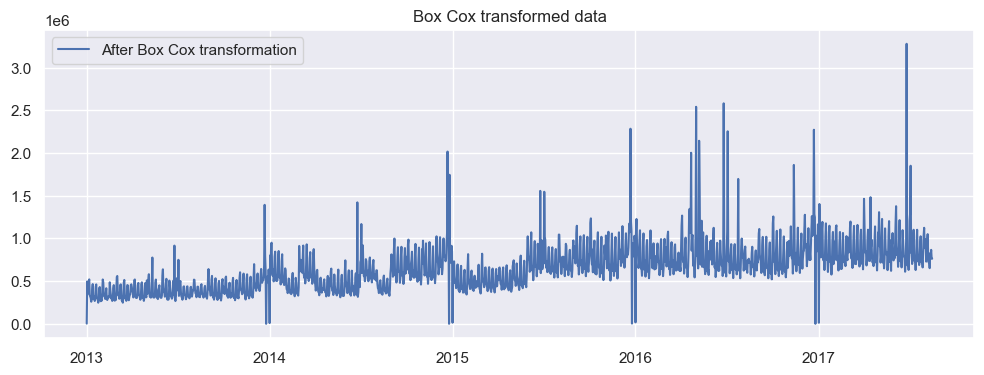

In [141]:
from scipy.stats import boxcox

# Apply a shift to make the data positive
shifted_data = daily_sum_sales['sales'] + abs(daily_sum_sales['sales'].min()) + 1 # This was to handle an error, saying the dataframe contains non-negative values

# Perform Box-Cox transformation on the shifted data
data_boxcox = pd.Series(boxcox(shifted_data, lmbda=1), index=daily_sum_sales.index)

# Plot the transformed data 
plt.figure(figsize=(12, 4))
plt.plot(data_boxcox, label='After Box Cox transformation')
plt.legend(loc='best')
plt.title('Box Cox transformed data')
plt.show()

##### Differencing

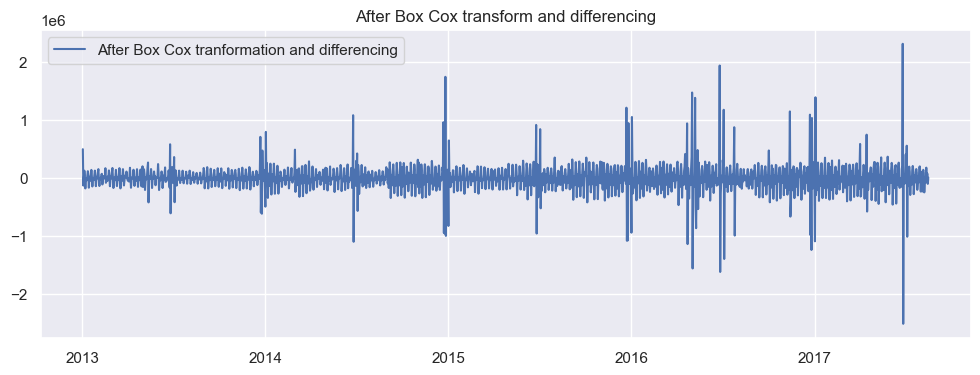

In [142]:
# Now we difference to remove trend
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data_boxcox.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [143]:
data_boxcox_diff.isna().sum()

1

In [144]:
# Revome null values after making the shift
data_boxcox_diff.dropna(inplace=True)

In [145]:
stats, p, lags, critical_values=kpss(data_boxcox_diff, 'ct')

print(f'Test_statistics: {stats}')
print(f'p-value: {p}')
print(f'Critical values: {critical_values}')

if p < 0.05 :
    print('Series is not stationary')
else :
    print('Series is stationary')

Test_statistics: 0.020468814057056715
p-value: 0.1
Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is stationary


C:\Users\jmutonyi\AppData\Local\Temp\ipykernel_32272\4103237335.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




#### Encoding & Scaling

In [146]:
train.head()

date  store_nbr                        family  sales  onpromotion  \
0 2013-01-01       1.00         AUTOMOTIVE & HARDWARE   0.00         0.00   
1 2013-01-01      42.00  STATIONERY & OFFICE SUPPLIES   0.00         0.00   
2 2013-01-01      42.00                       GROCERY   0.00         0.00   
3 2013-01-01      42.00  STATIONERY & OFFICE SUPPLIES   0.00         0.00   
4 2013-01-01      42.00          BEVERAGES AND LIQUOR   0.00         0.00   

   oil_price    city      state  store_cluster  events  Year  Month  Day  \
0      93.14   Quito  Pichincha             13       1  2013      1    1   
1      93.14  Cuenca      Azuay              2       1  2013      1    1   
2      93.14  Cuenca      Azuay              2       1  2013      1    1   
3      93.14  Cuenca      Azuay              2       1  2013      1    1   
4      93.14  Cuenca      Azuay              2       1  2013      1    1   

   Quarter  Week  day_of_week  is_weekend  sales_lag_1  sales_lag_7  \
0        1     1            1           0         0.00         0.00   
1        1     1            1           0         0.00         0.00   
2        1     1            1           0         0.00         0.00   
3        1     1            1           0         0.00         0.00   
4        1     1            1           0         0.00         0.00   

   week_lag_1  sales_rolling_avg  
0          26               0.00  
1           1               0.00  
2           1               0.00  
3           1               0.00  
4           1               0.00

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054352 entries, 0 to 3054351
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   store_nbr          float64       
 2   family             object        
 3   sales              float64       
 4   onpromotion        float64       
 5   oil_price          float64       
 6   city               object        
 7   state              object        
 8   store_cluster      int64         
 9   events             int64         
 10  Year               int32         
 11  Month              int32         
 12  Day                int32         
 13  Quarter            int32         
 14  Week               UInt32        
 15  day_of_week        int32         
 16  is_weekend         int32         
 17  sales_lag_1        float64       
 18  sales_lag_7        float64       
 19  week_lag_1         UInt32        
 20  sales_rolling_avg  float

In [153]:
train.set_index(['date'], inplace=True)

In [154]:
# Dividing numerical and categorical columns
numerical_columns = train.select_dtypes(exclude=['object']).columns
categorical_columns = train.select_dtypes(include=['object']).columns

# Subset of the numerical columns
Train_num = train[numerical_columns]

# A subset of the categorical columns
Train_cat = train[categorical_columns]
# Convert boolean columns to strings
Train_cat = Train_cat.astype(str)
#THe shape of each
Train_num.shape,Train_cat.shape

((3054352, 18), (3054352, 3))

In [155]:
Train_num.head()

index  store_nbr  sales  onpromotion  oil_price  store_cluster  \
date                                                                         
2013-01-01      0       1.00   0.00         0.00      93.14             13   
2013-01-01      1      42.00   0.00         0.00      93.14              2   
2013-01-01      2      42.00   0.00         0.00      93.14              2   
2013-01-01      3      42.00   0.00         0.00      93.14              2   
2013-01-01      4      42.00   0.00         0.00      93.14              2   

            events  Year  Month  Day  Quarter  Week  day_of_week  is_weekend  \
date                                                                           
2013-01-01       1  2013      1    1        1     1            1           0   
2013-01-01       1  2013      1    1        1     1            1           0   
2013-01-01       1  2013      1    1        1     1            1           0   
2013-01-01       1  2013      1    1        1     1            1           0   
2013-01-01       1  2013      1    1        1     1            1           0   

            sales_lag_1  sales_lag_7  week_lag_1  sales_rolling_avg  
date                                                                 
2013-01-01         0.00         0.00          26               0.00  
2013-01-01         0.00         0.00           1               0.00  
2013-01-01         0.00         0.00           1               0.00  
2013-01-01         0.00         0.00           1               0.00  
2013-01-01         0.00         0.00           1               0.00

In [150]:
adsdsf = asdjkasjd
asddasd

NameError: name 'asdjkasjd' is not defined

In [ ]:
# using one hot encoder to encode family column

cat = ["family"]

# Initialize the OneHotEncoder
cat_train_encoder = OneHotEncoder()

# Fit and transform the categorical features
encoded_train_features = cat_train_encoder.fit_transform(merged_train[cat])

# Convert the encoded features to a DataFrame
encoded_train_df = pd.DataFrame(encoded_train_features.toarray(), columns=cat_train_encoder.get_feature_names_out(merged_train[cat].columns))

encoded_train_df

family_AUTOMOTIVE  family_BEAUTY AND FASHION   
0                     1.00                       0.00  \
1                     0.00                       1.00   
2                     0.00                       1.00   
3                     0.00                       0.00   
4                     0.00                       0.00   
...                    ...                        ...   
3054343               0.00                       0.00   
3054344               0.00                       0.00   
3054345               0.00                       0.00   
3054346               0.00                       0.00   
3054347               0.00                       0.00   

         family_BEVERAGES AND LIQUOR  family_FROZEN FOODS  family_GROCERY   
0                               0.00                 0.00            0.00  \
1                               0.00                 0.00            0.00   
2                               0.00                 0.00            0.00   
3                               1.00                 0.00            0.00   
4                               0.00                 0.00            0.00   
...                              ...                  ...             ...   
3054343                         0.00                 1.00            0.00   
3054344                         0.00                 0.00            1.00   
3054345                         0.00                 0.00            1.00   
3054346                         0.00                 0.00            0.00   
3054347                         0.00                 1.00            0.00   

         family_HOME AND KITCHEN  family_HOME CARE AND GARDEN   
0                           0.00                         0.00  \
1                           0.00                         0.00   
2                           0.00                         0.00   
3                           0.00                         0.00   
4                           0.00                         0.00   
...                          ...                          ...   
3054343                     0.00                         0.00   
3054344                     0.00                         0.00   
3054345                     0.00                         0.00   
3054346                     0.00                         0.00   
3054347                     0.00                         0.00   

         family_PET SUPPLIES  family_SCHOOL AND OFFICE SUPPLIES  
0                       0.00                               0.00  
1                       0.00                               0.00  
2                       0.00                               0.00  
3                       0.00                               0.00  
4                       0.00                               1.00  
...                      ...                                ...  
3054343                 0.00                               0.00  
3054344                 0.00                               0.00  
3054345                 0.00                               0.00  
3054346                 0.00                               1.00  
3054347                 0.00                               0.00  

[3054348 rows x 9 columns]

In [ ]:
# encoded categories

cat_train_encoder.categories_

[array(['AUTOMOTIVE', 'BEAUTY AND FASHION', 'BEVERAGES AND LIQUOR',
        'FROZEN FOODS', 'GROCERY', 'HOME AND KITCHEN',
        'HOME CARE AND GARDEN', 'PET SUPPLIES',
        'SCHOOL AND OFFICE SUPPLIES'], dtype=object)]

In [ ]:
# to numpy array

encoded_train_features.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Concatenate the encoded columns with the original data

merged_train_encoded = pd.concat([merged_train.reset_index(drop=True), encoded_train_df], axis=1)

In [ ]:
merged_train_encoded.head()

id       date  store_nbr                      family  sales  onpromotion   
0 0.00 2013-01-01       1.00                  AUTOMOTIVE   0.00         0.00  \
1 1.00 2013-01-01       1.00          BEAUTY AND FASHION   0.00         0.00   
2 2.00 2013-01-01       1.00          BEAUTY AND FASHION   0.00         0.00   
3 3.00 2013-01-01       1.00        BEVERAGES AND LIQUOR   0.00         0.00   
4 4.00 2013-01-01       1.00  SCHOOL AND OFFICE SUPPLIES   0.00         0.00   

   store_cluster  oil_price  events  Year  Month  Day  quarter  week_of_year   
0             13      93.14       1  2013      1    1        1             1  \
1             13      93.14       1  2013      1    1        1             1   
2             13      93.14       1  2013      1    1        1             1   
3             13      93.14       1  2013      1    1        1             1   
4             13      93.14       1  2013      1    1        1             1   

   day_of_week  is_weekend  family_AUTOMOTIVE  family_BEAUTY AND FASHION   
0            1           0               1.00                       0.00  \
1            1           0               0.00                       1.00   
2            1           0               0.00                       1.00   
3            1           0               0.00                       0.00   
4            1           0               0.00                       0.00   

   family_BEVERAGES AND LIQUOR  family_FROZEN FOODS  family_GROCERY   
0                         0.00                 0.00            0.00  \
1                         0.00                 0.00            0.00   
2                         0.00                 0.00            0.00   
3                         1.00                 0.00            0.00   
4                         0.00                 0.00            0.00   

   family_HOME AND KITCHEN  family_HOME CARE AND GARDEN  family_PET SUPPLIES   
0                     0.00                         0.00                 0.00  \
1                     0.00                         0.00                 0.00   
2                     0.00                         0.00                 0.00   
3                     0.00                         0.00                 0.00   
4                     0.00                         0.00                 0.00   

   family_SCHOOL AND OFFICE SUPPLIES  
0                               0.00  
1                               0.00  
2                               0.00  
3                               0.00  
4                               1.00

In [ ]:
# drop original cat column

final_train = merged_train_encoded.drop(columns = ["family"])

In [ ]:
final_train.tail()

id       date  store_nbr    sales  onpromotion   
3054343 3,000,883.00 2017-08-15       9.00   438.13         0.00  \
3054344 3,000,884.00 2017-08-15       9.00   154.55         1.00   
3054345 3,000,885.00 2017-08-15       9.00 2,419.73       148.00   
3054346 3,000,886.00 2017-08-15       9.00   121.00         8.00   
3054347 3,000,887.00 2017-08-15       9.00    16.00         0.00   

         store_cluster  oil_price  events  Year  Month  Day  quarter   
3054343              6      47.57       1  2017      8   15        3  \
3054344              6      47.57       1  2017      8   15        3   
3054345              6      47.57       1  2017      8   15        3   
3054346              6      47.57       1  2017      8   15        3   
3054347              6      47.57       1  2017      8   15        3   

         week_of_year  day_of_week  is_weekend  family_AUTOMOTIVE   
3054343            33            1           0               0.00  \
3054344            33            1           0               0.00   
3054345            33            1           0               0.00   
3054346            33            1           0               0.00   
3054347            33            1           0               0.00   

         family_BEAUTY AND FASHION  family_BEVERAGES AND LIQUOR   
3054343                       0.00                         0.00  \
3054344                       0.00                         0.00   
3054345                       0.00                         0.00   
3054346                       0.00                         0.00   
3054347                       0.00                         0.00   

         family_FROZEN FOODS  family_GROCERY  family_HOME AND KITCHEN   
3054343                 1.00            0.00                     0.00  \
3054344                 0.00            1.00                     0.00   
3054345                 0.00            1.00                     0.00   
3054346                 0.00            0.00                     0.00   
3054347                 1.00            0.00                     0.00   

         family_HOME CARE AND GARDEN  family_PET SUPPLIES   
3054343                         0.00                 0.00  \
3054344                         0.00                 0.00   
3054345                         0.00                 0.00   
3054346                         0.00                 0.00   
3054347                         0.00                 0.00   

         family_SCHOOL AND OFFICE SUPPLIES  
3054343                               0.00  
3054344                               0.00  
3054345                               0.00  
3054346                               1.00  
3054347                               0.00

In [ ]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 24 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   id                                 float64       
 1   date                               datetime64[ns]
 2   store_nbr                          float64       
 3   sales                              float64       
 4   onpromotion                        float64       
 5   store_cluster                      int64         
 6   oil_price                          float64       
 7   events                             int64         
 8   Year                               int32         
 9   Month                              int32         
 10  Day                                int32         
 11  quarter                            int32         
 12  week_of_year                       int32         
 13  day_of_week                        int32         
 14  is

##### Scaling

In [ ]:
final_train.columns

Index(['id', 'date', 'store_nbr', 'sales', 'onpromotion', 'store_cluster',
       'oil_price', 'events', 'Year', 'Month', 'Day', 'quarter',
       'week_of_year', 'day_of_week', 'is_weekend', 'family_AUTOMOTIVE',
       'family_BEAUTY AND FASHION', 'family_BEVERAGES AND LIQUOR',
       'family_FROZEN FOODS', 'family_GROCERY', 'family_HOME AND KITCHEN',
       'family_HOME CARE AND GARDEN', 'family_PET SUPPLIES',
       'family_SCHOOL AND OFFICE SUPPLIES'],
      dtype='object')

In [ ]:
# define the columns to be scaled
cols_to_scale = ['store_nbr', 'sales', 'onpromotion', 'store_cluster', 'oil_price',
                  'Year', 'Month', 'Day', 'quarter', 'week_of_year',
                  'day_of_week', 'is_weekend']

# instance of standard scaler
scaler = StandardScaler()

# output the transformed data as a pandas DataFrame instead of NumPy array
scaler.set_output(transform="pandas")

# fit scaler to selected columns
scaler.fit(final_train[cols_to_scale])

StandardScaler()

In [ ]:
final_train_2 = final_train.copy()

In [ ]:
# Transform the selected columns and replace the original columns with the scaled ones
final_train_2[cols_to_scale] = scaler.transform(final_train[cols_to_scale])

In [ ]:
final_train_2.tail()

id       date  store_nbr  sales  onpromotion  store_cluster   
3054343 3,000,883.00 2017-08-15      -1.19   0.07        -0.21          -0.53  \
3054344 3,000,884.00 2017-08-15      -1.19  -0.18        -0.13          -0.53   
3054345 3,000,885.00 2017-08-15      -1.19   1.86        11.86          -0.53   
3054346 3,000,886.00 2017-08-15      -1.19  -0.21         0.44          -0.53   
3054347 3,000,887.00 2017-08-15      -1.19  -0.31        -0.21          -0.53   

         oil_price  events  Year  Month   Day  quarter  week_of_year   
3054343      -0.79       1  1.60   0.53 -0.07     0.54          0.52  \
3054344      -0.79       1  1.60   0.53 -0.07     0.54          0.52   
3054345      -0.79       1  1.60   0.53 -0.07     0.54          0.52   
3054346      -0.79       1  1.60   0.53 -0.07     0.54          0.52   
3054347      -0.79       1  1.60   0.53 -0.07     0.54          0.52   

         day_of_week  is_weekend  family_AUTOMOTIVE   
3054343        -1.00       -0.64               0.00  \
3054344        -1.00       -0.64               0.00   
3054345        -1.00       -0.64               0.00   
3054346        -1.00       -0.64               0.00   
3054347        -1.00       -0.64               0.00   

         family_BEAUTY AND FASHION  family_BEVERAGES AND LIQUOR   
3054343                       0.00                         0.00  \
3054344                       0.00                         0.00   
3054345                       0.00                         0.00   
3054346                       0.00                         0.00   
3054347                       0.00                         0.00   

         family_FROZEN FOODS  family_GROCERY  family_HOME AND KITCHEN   
3054343                 1.00            0.00                     0.00  \
3054344                 0.00            1.00                     0.00   
3054345                 0.00            1.00                     0.00   
3054346                 0.00            0.00                     0.00   
3054347                 1.00            0.00                     0.00   

         family_HOME CARE AND GARDEN  family_PET SUPPLIES   
3054343                         0.00                 0.00  \
3054344                         0.00                 0.00   
3054345                         0.00                 0.00   
3054346                         0.00                 0.00   
3054347                         0.00                 0.00   

         family_SCHOOL AND OFFICE SUPPLIES  
3054343                               0.00  
3054344                               0.00  
3054345                               0.00  
3054346                               1.00  
3054347                               0.00

In [ ]:
# set date column as index

final_train_2=final_train_2.set_index(['date'])

In [ ]:
final_train_2.drop(columns='id', inplace=True)

In [ ]:
final_train_2.tail()

store_nbr  sales  onpromotion  store_cluster  oil_price  events   
date                                                                          
2017-08-15      -1.19   0.07        -0.21          -0.53      -0.79       1  \
2017-08-15      -1.19  -0.18        -0.13          -0.53      -0.79       1   
2017-08-15      -1.19   1.86        11.86          -0.53      -0.79       1   
2017-08-15      -1.19  -0.21         0.44          -0.53      -0.79       1   
2017-08-15      -1.19  -0.31        -0.21          -0.53      -0.79       1   

            Year  Month   Day  quarter  week_of_year  day_of_week  is_weekend   
date                                                                            
2017-08-15  1.60   0.53 -0.07     0.54          0.52        -1.00       -0.64  \
2017-08-15  1.60   0.53 -0.07     0.54          0.52        -1.00       -0.64   
2017-08-15  1.60   0.53 -0.07     0.54          0.52        -1.00       -0.64   
2017-08-15  1.60   0.53 -0.07     0.54          0.52        -1.00       -0.64   
2017-08-15  1.60   0.53 -0.07     0.54          0.52        -1.00       -0.64   

            family_AUTOMOTIVE  family_BEAUTY AND FASHION   
date                                                       
2017-08-15               0.00                       0.00  \
2017-08-15               0.00                       0.00   
2017-08-15               0.00                       0.00   
2017-08-15               0.00                       0.00   
2017-08-15               0.00                       0.00   

            family_BEVERAGES AND LIQUOR  family_FROZEN FOODS  family_GROCERY   
date                                                                           
2017-08-15                         0.00                 1.00            0.00  \
2017-08-15                         0.00                 0.00            1.00   
2017-08-15                         0.00                 0.00            1.00   
2017-08-15                         0.00                 0.00            0.00   
2017-08-15                         0.00                 1.00            0.00   

            family_HOME AND KITCHEN  family_HOME CARE AND GARDEN   
date                                                               
2017-08-15                     0.00                         0.00  \
2017-08-15                     0.00                         0.00   
2017-08-15                     0.00                         0.00   
2017-08-15                     0.00                         0.00   
2017-08-15                     0.00                         0.00   

            family_PET SUPPLIES  family_SCHOOL AND OFFICE SUPPLIES  
date                                                                
2017-08-15                 0.00                               0.00  
2017-08-15                 0.00                               0.00  
2017-08-15                 0.00                               0.00  
2017-08-15                 0.00                               1.00  
2017-08-15                 0.00                               0.00

In [ ]:
# save to csv

final_train_2.to_csv('Data Tables/encoded_train_data.csv', index=False)

In [ ]:
csv_filename = 'Data Tables/encoded_train_data.csv'
zip_filename = 'Data Tables/encoded_train_data.zip'

# Create a ZIP archive and add the CSV file to it
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(csv_filename)

##### Train and Test Data

In [ ]:
merged_monthly_mean.shape

(56, 1)

In [ ]:
# splitting train and eval set for daily data

train_monthly = merged_monthly_mean[0:40]
eval_monthly = merged_monthly_mean[40:]

In [ ]:
train_monthly.shape, eval_monthly.shape

((40, 1), (16, 1))

## 4. Modelling

##### 1. AR model

- ACF: ACF is used to identify the order of the Moving Average (MA) term in a time series model. Peaks or significant spikes in the ACF plot at certain lags indicate potential MA terms in the model.
- PACF: PACF is used to identify the order of the AutoRegressive (AR) term in a time series model. Peaks or significant spikes in the PACF plot at certain lags suggest potential AR terms in the model.

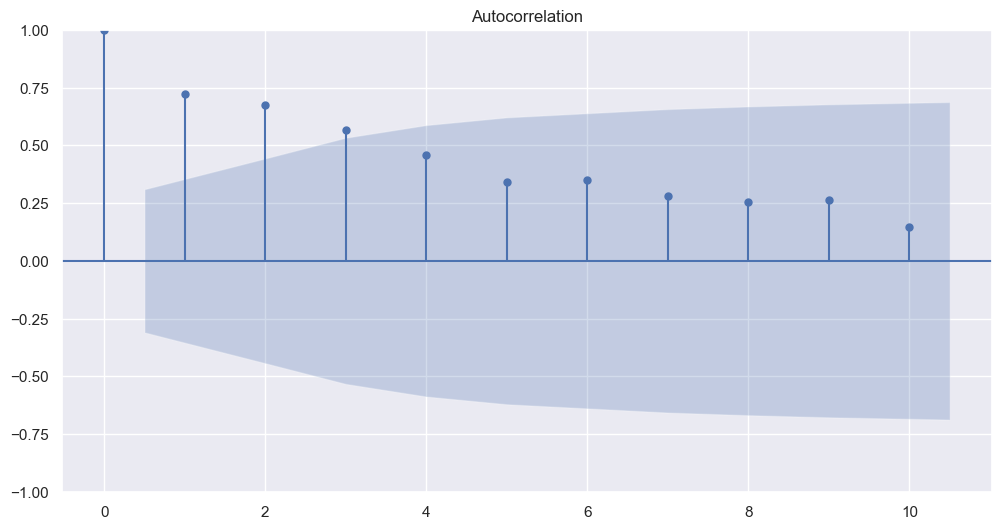

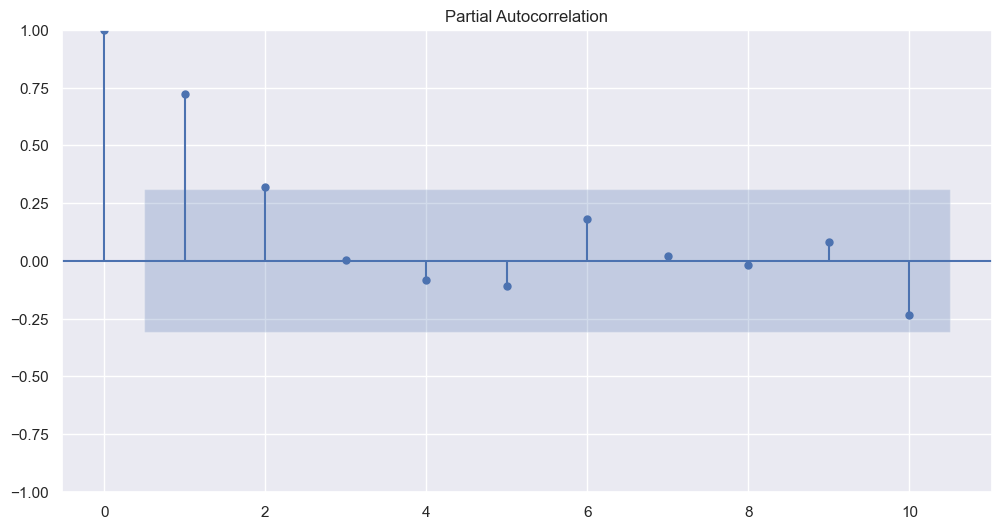

In [ ]:
acf = plot_acf(train_monthly['sales'], lags = 10)
pacf = plot_pacf(train_monthly['sales'], lags =10)

- Correlation at lag 1,2 and slightly at lag 6 on PACF

In [ ]:
# create an autoregressive model with lag of 6
# fit the model to the training data

model_1 = AutoReg(train_monthly, lags = 6).fit()

In [ ]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  sales   No. Observations:                   40
Model:                     AutoReg(6)   Log Likelihood                -183.219
Method:               Conditional MLE   S.D. of innovations             52.977
Date:                Sun, 17 Sep 2023   AIC                            382.439
Time:                        21:29:06   BIC                            394.649
Sample:                    07-31-2013   HQIC                           386.603
                         - 04-30-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4436     41.023      0.937      0.349     -41.960     118.847
sales.L1       0.3973      0.163      2.437      0.015       0.078       0.717
sales.L2       0.4395      0.176      2.493      0.013       0.094       0.785
sales.L3       0.0340      0.188      0.180      0.857      -0.335       0.403
sales.L4      -0.2174      0.188     -1.155      0.248      -0.586       0.151
sales.L5      -0.1319      0.187     -0.706      0.480      -0.498       0.234
sales.L6       0.4166      0.173      2.402      0.016       0.077       0.756
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1643           -0.0000j            1.1643           -0.5000
AR.2           -0.6198           -1.0032j            1.1792           -0.3381
AR.3           -0.6198           +1.0032j            1.1792            0.3381
AR.4            1.0252           -0.0000j            1.0252           -0.0000
AR.5            0.8477           -0.8531j            1.2026           -0.1255
AR.6            0.8477           +0.8531j            1.2026            0.1255
-----------------------------------------------------------------------------
"""

In [ ]:
# Make predictions using the AR model on train and evaluation data

AR_pred = model_1.predict (start = len(train_monthly),
                           end = len(train_monthly) + len(eval_monthly) - 1,
                           dynamic = False
                           )

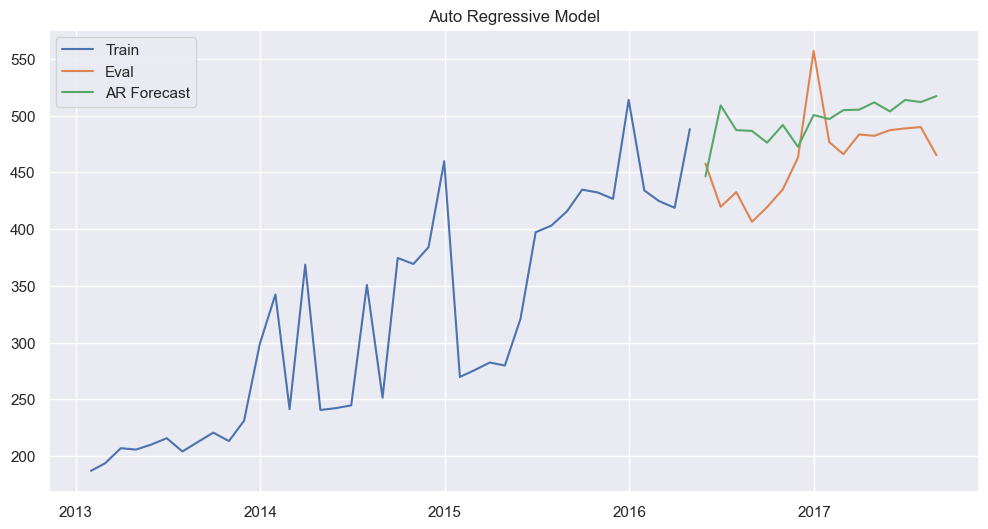

In [ ]:
# plot the train, evaluation and model predictions

plt.figure(figsize = (12,6))
plt.plot(train_monthly['sales'], label = 'Train')
plt.plot(eval_monthly['sales'], label = 'Eval')
plt.plot (AR_pred, label = 'AR Forecast')
plt.legend(loc='upper left')
plt.title('Auto Regressive Model')
plt.show()

In [ ]:
# evaluation metrics of the model

mse = mean_squared_error(eval_monthly, AR_pred)
msle = mean_squared_log_error(eval_monthly, AR_pred)
rmse = np.sqrt(mean_squared_error(eval_monthly, AR_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(eval_monthly, AR_pred)).round(2)

results_1 = pd.DataFrame([['AR', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results_1

Model      MSE  MSLE  RMSE  RMSLE
0    AR 2,164.30  0.01 46.52   0.10

##### 2. ARIMA model

In [ ]:
# We use pmdarima to determine the best parameter for our ARIMA model.

stepwise_fit = auto_arima(train_monthly['sales'], trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=437.525, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=429.622, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=436.112, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=431.158, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=429.012, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=430.786, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=430.801, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=429.340, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=432.769, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.922 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -212.506
Date:                Sun, 17 Sep 2023   AIC                            429.012
Time:                        21:29:09   BIC                            432.339
Sample:                    01-31-2013   HQIC                           430.206
                         - 04-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4569      0.116     -3.924      0.000      -0.685      -0.229
sigma2      3145.8666    722.718      4.353      0.000    1729.365    4562.368
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 2.60
Prob(Q):                              0.61   Prob(JB):                         0.27
Heteroskedasticity (H):               1.53   Skew:                            -0.56
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# create ARIMA model with bestparameter (1,1,0)

model_2 = ARIMA(train_monthly, order=(1,1,0))
model_2_fit = model_2.fit()
model_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   40
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -212.506
Date:                Sun, 17 Sep 2023   AIC                            429.012
Time:                        21:29:09   BIC                            432.339
Sample:                    01-31-2013   HQIC                           430.206
                         - 04-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4569      0.116     -3.924      0.000      -0.685      -0.229
sigma2      3145.8666    722.718      4.353      0.000    1729.365    4562.368
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 2.60
Prob(Q):                              0.61   Prob(JB):                         0.27
Heteroskedasticity (H):               1.53   Skew:                            -0.56
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Make predictions on the test data

ARIMA_pred = model_2_fit.predict(start=len(train_monthly),
                                 end=len(train_monthly) + len(eval_monthly) - 1,
                                 typ="levels")

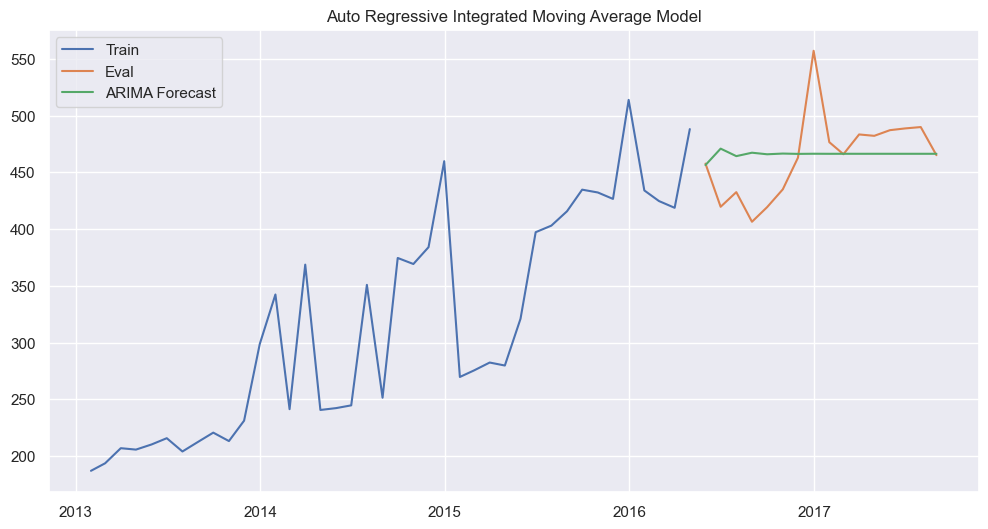

In [ ]:
# plot the train, evaluation and model predictions

plt.figure(figsize = (12,6))
plt.plot(train_monthly['sales'], label = 'Train')
plt.plot(eval_monthly['sales'], label = 'Eval')
plt.plot (ARIMA_pred, label = 'ARIMA Forecast')
plt.legend(loc='upper left')
plt.title('Auto Regressive Integrated Moving Average Model')
plt.show()

In [ ]:
# evaluation metrics of the model

mse = mean_squared_error(eval_monthly, ARIMA_pred)
msle = mean_squared_log_error(eval_monthly, ARIMA_pred)
rmse = np.sqrt(mean_squared_error(eval_monthly, ARIMA_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(eval_monthly, ARIMA_pred)).round(2)

model_results = pd.DataFrame([['ARIMA', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results_2 = pd.concat([results_1, model_results], ignore_index=True)
results_2

Model      MSE  MSLE  RMSE  RMSLE
0     AR 2,164.30  0.01 46.52   0.10
1  ARIMA 1,305.08  0.01 36.13   0.08

##### 3. SARIMA model

In [ ]:
# Create SARIMA model

model_3 = SARIMAX(train_monthly, order=(1,1,1), seasonal_order=(1,0,0,12)) 
model_3_fit = model_3.fit()
model_3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               sales   No. Observations:                   40
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -211.793
Date:                             Sun, 17 Sep 2023   AIC                            431.587
Time:                                     21:29:10   BIC                            438.241
Sample:                                 01-31-2013   HQIC                           433.974
                                      - 04-30-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4340      0.398     -1.090      0.276      -1.214       0.346
ma.L1         -0.0560      0.489     -0.114      0.909      -1.015       0.903
ar.S.L12       0.1839      0.236      0.778      0.437      -0.279       0.647
sigma2      2999.1259    698.479      4.294      0.000    1630.133    4368.119
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 6.43
Prob(Q):                              0.79   Prob(JB):                         0.04
Heteroskedasticity (H):               1.29   Skew:                            -0.73
Prob(H) (two-sided):                  0.65   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Make predictions on the test data

SARIMA_pred = model_3_fit.predict(start=len(train_monthly),
                                 end=len(train_monthly) + len(eval_monthly) - 1,
                                 typ="levels")

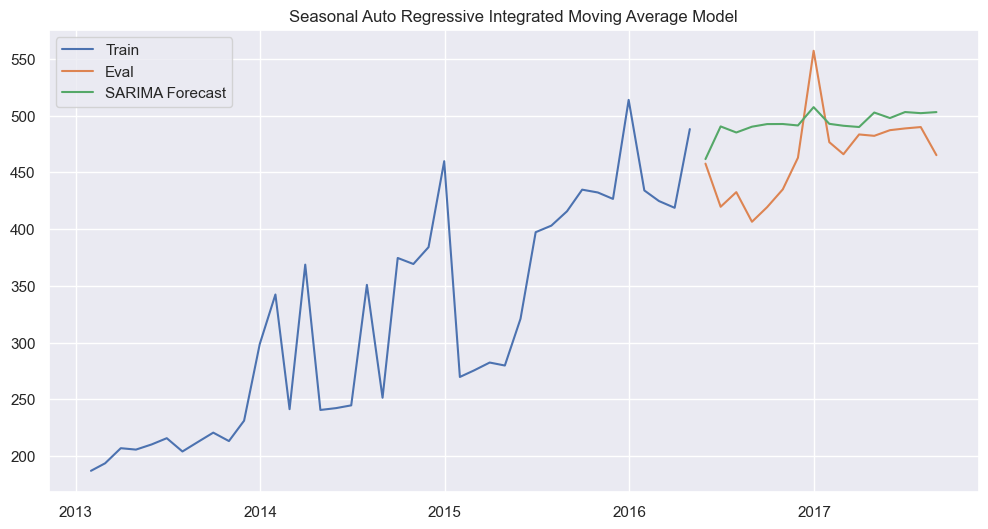

In [ ]:
# plot the train, evaluation and model predictions

plt.figure(figsize = (12,6))
plt.plot(train_monthly['sales'], label = 'Train')
plt.plot(eval_monthly['sales'], label = 'Eval')
plt.plot (SARIMA_pred, label = 'SARIMA Forecast')
plt.legend(loc='upper left')
plt.title('Seasonal Auto Regressive Integrated Moving Average Model')
plt.show()

In [ ]:
# evaluation metrics of the model

mse = mean_squared_error(eval_monthly, SARIMA_pred)
msle = mean_squared_log_error(eval_monthly, SARIMA_pred)
rmse = np.sqrt(mean_squared_error(eval_monthly, SARIMA_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(eval_monthly, SARIMA_pred)).round(2)

model_results = pd.DataFrame([['SARIMA', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results_3 = pd.concat([results_2, model_results], ignore_index=True)
results_3

Model      MSE  MSLE  RMSE  RMSLE
0      AR 2,164.30  0.01 46.52   0.10
1   ARIMA 1,305.08  0.01 36.13   0.08
2  SARIMA 1,876.95  0.01 43.32   0.09

- The ARIMA model is our best performinf model with an RMLSE of 0.08

### Traditional ML Models

- Let's train some traditional ML models as well
- We will use our encoded multivariate data with the other features

In [ ]:
final_train.shape

(3054348, 24)

In [ ]:
# reset index and view first 5 rows

final_train.reset_index(inplace=True)
final_train.head()

index   id       date  store_nbr  sales  onpromotion  store_cluster   
0      0 0.00 2013-01-01       1.00   0.00         0.00             13  \
1      1 1.00 2013-01-01       1.00   0.00         0.00             13   
2      2 2.00 2013-01-01       1.00   0.00         0.00             13   
3      3 3.00 2013-01-01       1.00   0.00         0.00             13   
4      4 4.00 2013-01-01       1.00   0.00         0.00             13   

   oil_price  events  Year  Month  Day  quarter  week_of_year  day_of_week   
0      93.14       1  2013      1    1        1             1            1  \
1      93.14       1  2013      1    1        1             1            1   
2      93.14       1  2013      1    1        1             1            1   
3      93.14       1  2013      1    1        1             1            1   
4      93.14       1  2013      1    1        1             1            1   

   is_weekend  family_AUTOMOTIVE  family_BEAUTY AND FASHION   
0           0               1.00                       0.00  \
1           0               0.00                       1.00   
2           0               0.00                       1.00   
3           0               0.00                       0.00   
4           0               0.00                       0.00   

   family_BEVERAGES AND LIQUOR  family_FROZEN FOODS  family_GROCERY   
0                         0.00                 0.00            0.00  \
1                         0.00                 0.00            0.00   
2                         0.00                 0.00            0.00   
3                         1.00                 0.00            0.00   
4                         0.00                 0.00            0.00   

   family_HOME AND KITCHEN  family_HOME CARE AND GARDEN  family_PET SUPPLIES   
0                     0.00                         0.00                 0.00  \
1                     0.00                         0.00                 0.00   
2                     0.00                         0.00                 0.00   
3                     0.00                         0.00                 0.00   
4                     0.00                         0.00                 0.00   

   family_SCHOOL AND OFFICE SUPPLIES  
0                               0.00  
1                               0.00  
2                               0.00  
3                               0.00  
4                               1.00

- Tree based and regression models do not necessarily require scaled numerical data, only encoded categorical data

In [ ]:
final_train.drop(columns=['date', 'id', 'index'], inplace= True)

In [ ]:
# Split data into parts
x = final_train.drop(['sales'], axis = 1)
y = final_train['sales']

In [ ]:
# Split data into Train Test
X_train, X_test, y_train, y_test = x[0:2000000], x[2000000:], y[0:2000000], y[2000000:]

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2000000, 21), (1054348, 21), (2000000,), (1054348,))

##### 4. Linear Regression

In [ ]:
lin_model = LinearRegression()
model_lin = lin_model.fit(X_train, y_train)

# Make prediction on X_test
lin_pred = model_lin.predict(X_test)

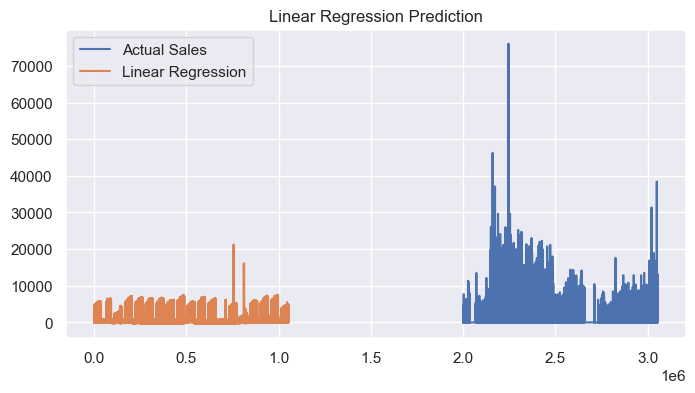

In [ ]:
# plot predicted and actual sales

plt.figure(figsize=(8,4))
plt.plot(y_test, label ='Actual Sales')
plt.plot(lin_pred, label='Linear Regression')
plt.legend(loc='best')
plt.title('Linear Regression Prediction')
plt.show()

In [ ]:
# evaluation metrics

mse = mean_squared_error(y_test, lin_pred )
rmse = np.sqrt(mean_squared_error(y_test, lin_pred )).round(2)

results = pd.DataFrame([['Linear', mse, rmse]], columns = ['Model', 'MSE', 'RMSE'])
results_4 = pd.concat([results_3, results], ignore_index=True)
results_4

Model          MSE  MSLE     RMSE  RMSLE
0      AR     2,164.30  0.01    46.52   0.10
1   ARIMA     1,305.08  0.01    36.13   0.08
2  SARIMA     1,876.95  0.01    43.32   0.09
3  Linear 1,804,030.44   NaN 1,343.14    NaN

##### 5. Decision tree

In [ ]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree_model = decision_tree.fit(X_train, y_train)

In [ ]:
# Make prediction on test

predict_tree = decision_tree.predict(X_test)

<BarContainer object of 21 artists>

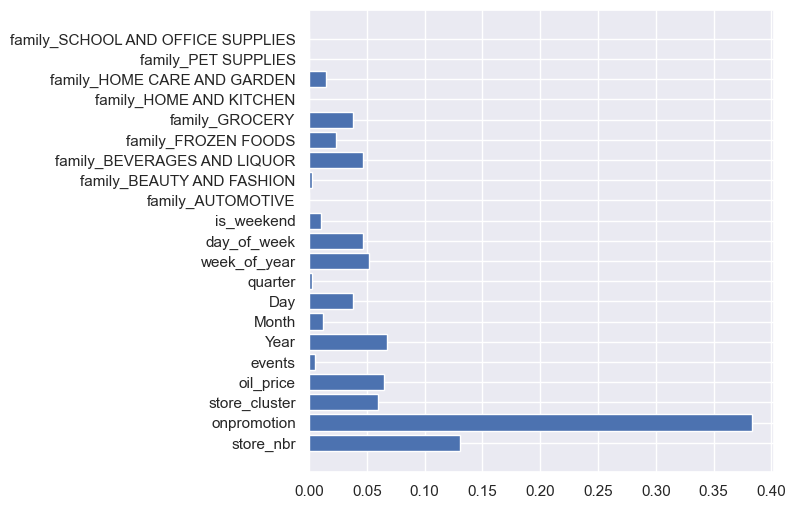

In [ ]:
#feature importance

plt.figure(figsize = (6,6))
plt.barh(X_train.columns, decision_tree_model.feature_importances_)

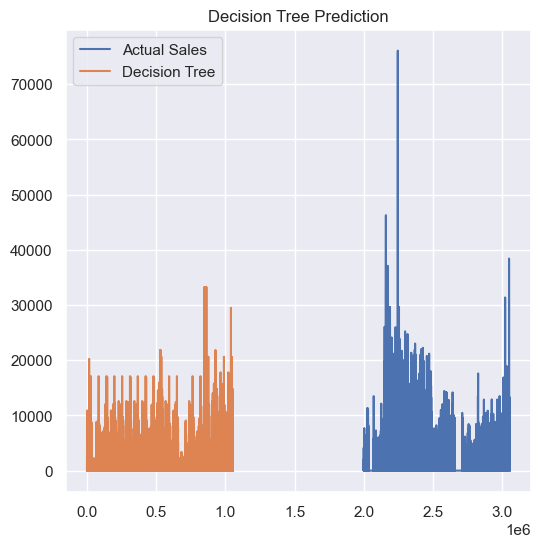

In [ ]:
# predicted and actual data

plt.figure(figsize=(6,6))
plt.plot(y_test, label = "Actual Sales")
plt.plot(predict_tree, label = "Decision Tree")
plt.legend(loc = "best")
plt.title("Decision Tree Prediction")
plt.show()

In [ ]:
# Evaluation metrics

mse = mean_squared_error(y_test, predict_tree)
msle = mean_squared_log_error(y_test, predict_tree)
rmse = np.sqrt(mean_squared_error(y_test, predict_tree )).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test, predict_tree)).round(2)

results = pd.DataFrame([['Decision Tree', mse,msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results_5 = pd.concat([results_4, results], ignore_index=True)
results_5

Model          MSE  MSLE     RMSE  RMSLE
0             AR     2,164.30  0.01    46.52   0.10
1          ARIMA     1,305.08  0.01    36.13   0.08
2         SARIMA     1,876.95  0.01    43.32   0.09
3         Linear 1,804,030.44   NaN 1,343.14    NaN
4  Decision Tree 1,553,544.21  4.88 1,246.41   2.21

##### 6. Xg Boost

In [ ]:
xgc = GradientBoostingRegressor(random_state=42) 
xg_boost = xgc.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
xg_boost_pred  = xgc.predict(X_test)

<BarContainer object of 21 artists>

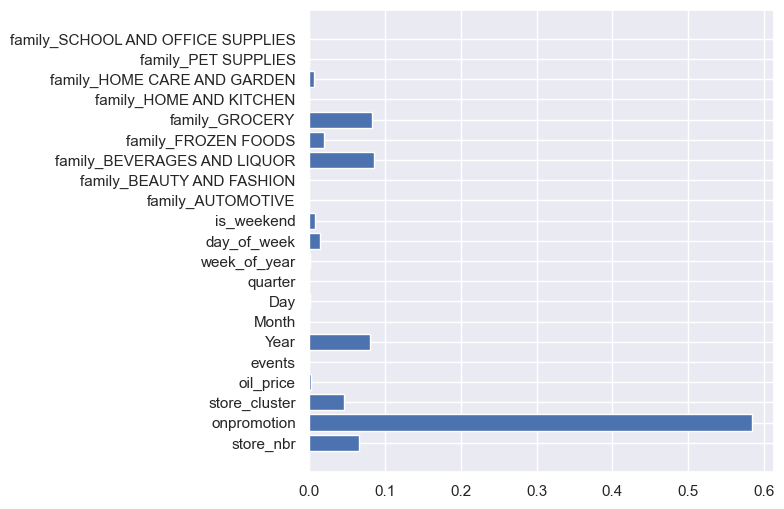

In [ ]:
#feature importance

plt.figure(figsize = (6,6))
plt.barh(X_train.columns, xg_boost.feature_importances_)

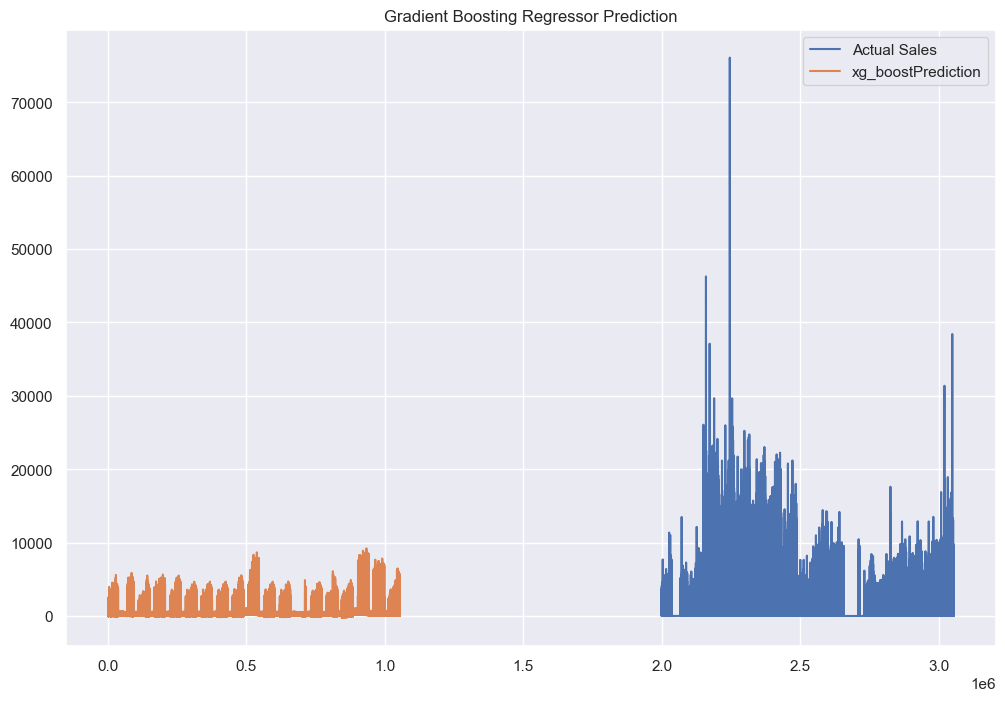

In [ ]:
# predicted and actual data

plt.figure(figsize=(12,8))
plt.plot(y_test, label = "Actual Sales")
plt.plot(xg_boost_pred, label = "xg_boostPrediction")
plt.legend(loc = "best")
plt.title("Gradient Boosting Regressor Prediction")
plt.show()

In [ ]:
# Evaluation Metrics

mse = mean_squared_error(y_test, xg_boost_pred)
rmse = np.sqrt(mean_squared_error(y_test, xg_boost_pred)).round(2)

results = pd.DataFrame([['XG Boost', mse, rmse]], columns = ['Model', 'MSE', 'RMSE'])
results_6 = pd.concat([results_5, results], ignore_index=True)
results_6

Model          MSE  MSLE     RMSE  RMSLE
0             AR     2,164.30  0.01    46.52   0.10
1          ARIMA     1,305.08  0.01    36.13   0.08
2         SARIMA     1,876.95  0.01    43.32   0.09
3         Linear 1,804,030.44   NaN 1,343.14    NaN
4  Decision Tree 1,553,544.21  4.88 1,246.41   2.21
5       XG Boost 1,517,962.97   NaN 1,232.06    NaN

In [ ]:
merged_monthly_mean

sales
date             
2013-01-31 186.95
2013-02-28 193.58
2013-03-31 206.88
2013-04-30 205.64
2013-05-31 210.18
2013-06-30 215.69
2013-07-31 203.98
2013-08-31 212.48
2013-09-30 220.59
2013-10-31 213.16
2013-11-30 231.14
2013-12-31 298.68
2014-01-31 342.34
2014-02-28 241.27
2014-03-31 368.66
2014-04-30 240.58
2014-05-31 242.20
2014-06-30 244.63
2014-07-31 350.83
2014-08-31 251.35
2014-09-30 374.53
2014-10-31 369.21
2014-11-30 384.06
2014-12-31 459.82
2015-01-31 269.67
2015-02-28 275.42
2015-03-31 282.37
2015-04-30 279.74
2015-05-31 320.96
2015-06-30 397.25
2015-07-31 403.03
2015-08-31 415.69
2015-09-30 434.73
2015-10-31 432.25
2015-11-30 426.58
2015-12-31 513.85
2016-01-31 434.05
2016-02-29 424.70
2016-03-31 418.74
2016-04-30 488.11
2016-05-31 457.67
2016-06-30 419.64
2016-07-31 432.56
2016-08-31 406.44
2016-09-30 419.33
2016-10-31 435.00
2016-11-30 462.92
2016-12-31 557.11
2017-01-31 476.60
2017-02-28 465.97
2017-03-31 483.40
2017-04-30 482.17
2017-05-31 487.16
2017-06-30 488.71
2017-07-31 489.91
2017-08-31 465.14

#### Backtesting

In [ ]:
backtests = {
    1: ('2017-05-31', '2017-06-30'),
    2: ('2017-06-30', '2017-07-31'),
    3: ('2017-07-31', '2017-08-31')
}

# Backtests with ARIMA Model
scores = {}

for period in backtests.values():

    # Convert date strings to datetime objects
    start_date = pd.to_datetime(period[0])
    end_date = pd.to_datetime(period[1])

    # Filter the DataFrame based on datetime comparisons
    _train = merged_monthly_mean.reset_index()[merged_monthly_mean.reset_index()['date'] < start_date]
    _test = merged_monthly_mean.reset_index()[(merged_monthly_mean.reset_index()['date'] >= start_date) & (merged_monthly_mean.reset_index()['date'] <= end_date)]
    
    Xtrain = _train.sales.values
    Xtest = _test.sales.values
    
    try:
        model = ARIMA(Xtrain, order=(1, 1, 0)).fit()

        # Initialize an empty array to store predictions
        ypred = []

        # Iterate through each data point in the test set and predict one step ahead
        for i in range(len(Xtest)):
            # Predict one step ahead by retraining the model
            ARIMA_model = ARIMA(Xtrain, order=(1, 1, 0)).fit()
            prediction = ARIMA_model.forecast(steps=1)[0]
            
            # Append the prediction to the result
            ypred.append(prediction)

            # Update the training data with the actual value
            Xtrain = np.append(Xtrain, Xtest[i])

        # Calculate RMSLE for the entire period
        rmsle = np.sqrt(mean_squared_log_error(Xtest, ypred))
        scores[str(period)] = rmsle
    except Exception as e:
        print(f"Error in period {period}: {str(e)}")

print(scores)


{"('2017-05-31', '2017-06-30')": 0.008402829695229236, "('2017-06-30', '2017-07-31')": 0.005966513027515765, "('2017-07-31', '2017-08-31')": 0.03596285186453937}


-The ARIMA model is performing well, with RSMLE scores of 0.2 consistently

#### Predictions

In [ ]:
merged_monthly_mean.index = pd.to_datetime(merged_monthly_mean.index)

merged_monthly_mean.index.max()

Timestamp('2017-08-31 00:00:00')

In [ ]:

# Define the last observed date
last_observed_date = pd.to_datetime("2017-08-31")

# Define the end date of the year
end_of_year = pd.to_datetime("2017-12-31")

# Create a list of future dates for prediction (monthly frequency)
future_dates = pd.date_range(start=last_observed_date + pd.DateOffset(months=1), end=end_of_year, freq='M')

# Make predictions for future dates
# Replace 'steps' with the number of future predictions you want
predictions = ARIMA_model.forecast(steps=len(future_dates))

# Create a DataFrame to store predictions and dates
future_predictions = pd.DataFrame({'date': future_dates, 'predicted_sales': predictions})

# Print or save the predictions for analysis
print(future_predictions)

        date  predicted_sales
0 2017-09-30           489.40
1 2017-10-31           489.62
2 2017-11-30           489.52
3 2017-12-31           489.56
